In [199]:
pip install shapely

Note: you may need to restart the kernel to use updated packages.


In [167]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np
from matplotlib.lines import Line2D

In [2]:
all_pickups = pd.read_csv('All_pickups.csv')
all_pickups

event_id            timestamp ocel_object_id  \
0             enter_tr1_Pcp404  2024-05-06 05:25:57            tr1   
1                          NaN  2024-05-06 05:26:27            tr1   
2                          NaN  2024-05-06 05:26:32            tr1   
3                          NaN  2024-05-06 05:26:37            tr1   
4                          NaN  2024-05-06 05:26:42            tr1   
...                        ...                  ...            ...   
36082                      NaN  2024-05-28 03:27:37            tr9   
36083  issue_ticket_tr9_Pcp267  2024-05-28 03:31:35            tr9   
36084   input_tally_tr9_Pcp267  2024-05-28 03:31:36            tr9   
36085      eval_tr9exit_Pcp267  2024-05-28 03:31:36            tr9   
36086          exit_tr9_Pcp267  2024-05-28 03:35:07            tr9   

      ocel_IoT_object_id rain_condition                   activity  RFID No  \
0             rfidBKTRLP      Have Rain             Enter the port      NaN   
1                    NaN            NaN       Track Truck Location      NaN   
2                    NaN            NaN       Track Truck Location      NaN   
3                    NaN            NaN       Track Truck Location      NaN   
4                    NaN            NaN       Track Truck Location      NaN   
...                  ...            ...                        ...      ...   
36082                NaN            NaN       Track Truck Location      NaN   
36083                NaN            NaN  Issue the Weighing Ticket      NaN   
36084                NaN            NaN      Input the Tally Sheet      NaN   
36085                NaN            NaN    Evaluate the Truck Exit      NaN   
36086                NaN            NaN              Exit the port      NaN   

      Cargo ID  LPT  Axles  ...  ArrivalSilo_Determine Determine_Stack  \
0          Cr5  NaN    NaN  ...              13.433333        1.366667   
1          Cr5  NaN    NaN  ...              13.433333        1.366667   
2          Cr5  NaN    NaN  ...              13.433333        1.366667   
3          Cr5  NaN    NaN  ...              13.433333        1.366667   
4          Cr5  NaN    NaN  ...              13.433333        1.366667   
...        ...  ...    ...  ...                    ...             ...   
36082     Cr19  NaN    NaN  ...               7.850000        5.850000   
36083     Cr19  NaN    NaN  ...               7.850000        5.850000   
36084     Cr19  NaN    NaN  ...               7.850000        5.850000   
36085     Cr19  NaN    NaN  ...               7.850000        5.850000   
36086     Cr19  NaN    NaN  ...               7.850000        5.850000   

      Stack_Loaded  LoadedWeighing_Eval Eval_Exit  \
0            103.6             3.833333  2.116667   
1            103.6             3.833333  2.116667   
2            103.6             3.833333  2.116667   
3            103.6             3.833333  2.116667   
4            103.6             3.833333  2.116667   
...            ...                  ...       ...   
36082         22.9             6.400000  3.516667   
36083         22.9             6.400000  3.516667   
36084         22.9             6.400000  3.516667   
36085         22.9             6.400000  3.516667   
36086         22.9             6.400000  3.516667   

       Enter_to_Register_TTL_count  Register_to_WeighEmpty_TTL_count  \
0                               16                                21   
1                               16                                21   
2                               16                                21   
3                               16                                21   
4                               16                                21   
...                            ...                               ...   
36082                           10                                24   
36083                           10                                24   
36084                           10                        

In [4]:
failed_weigh_ids = all_pickups[all_pickups['activity'] == 'Fail to Weigh']['pickup']
failed_weigh = all_pickups[all_pickups['pickup'].isin(failed_weigh_ids)]
failed_weigh

event_id            timestamp ocel_object_id  \
733           enter_tr10_Pcp385  2024-05-06 04:50:39           tr10   
734                         NaN  2024-05-06 04:50:54           tr10   
735                         NaN  2024-05-06 04:50:59           tr10   
736                         NaN  2024-05-06 04:51:04           tr10   
737                         NaN  2024-05-06 04:51:09           tr10   
...                         ...                  ...            ...   
26726                       NaN  2024-05-06 05:04:23           tr43   
26727                       NaN  2024-05-06 05:04:28           tr43   
26728   weigh_empty_tr43_Pcp468  2024-05-06 05:04:33           tr43   
26729  check_abnorm_tr43_Pcp468  2024-05-06 05:05:16           tr43   
26730    fail_weigh_tr43_Pcp468  2024-05-06 05:05:17           tr43   

      ocel_IoT_object_id rain_condition                              activity  \
733           rfidOOVDPE        No Rain                        Enter the port   
734                  NaN            NaN                  Track Truck Location   
735                  NaN            NaN                  Track Truck Location   
736                  NaN            NaN                  Track Truck Location   
737                  NaN            NaN                  Track Truck Location   
...                  ...            ...                                   ...   
26726                NaN            NaN                  Track Truck Location   
26727                NaN            NaN                  Track Truck Location   
26728               WS15            NaN                 Weigh the Empty Truck   
26729         rfidGETQDY            NaN  Check Empty Truck Weight Abnormality   
26730                NaN            NaN                         Fail to Weigh   

       RFID No Cargo ID  LPT  Axles  ...  ArrivalSilo_Determine  \
733        NaN      Cr7  NaN    NaN  ...                    NaN   
734        NaN      Cr7  NaN    NaN  ...                    NaN   
735        NaN      Cr7  NaN    NaN  ...                    NaN   
736        NaN      Cr7  NaN    NaN  ...                    NaN   
737        NaN      Cr7  NaN    NaN  ...                    NaN   
...        ...      ...  ...    ...  ...                    ...   
26726      NaN      Cr7  NaN    NaN  ...                    NaN   
26727      NaN      Cr7  NaN    NaN  ...                    NaN   
26728      NaN      Cr7  NaN    NaN  ...                    NaN   
26729      NaN      Cr7  NaN    NaN  ...                    NaN   
26730      NaN      Cr7  NaN    NaN  ...                    NaN   

      Determine_Stack Stack_Loaded  LoadedWeighing_Eval Eval_Exit  \
733               NaN          NaN                  NaN       NaN   
734               NaN          NaN                  NaN       NaN   
735               NaN          NaN                  NaN       NaN   
736               NaN          NaN                  NaN       NaN   
737               NaN          NaN                  NaN       NaN   
...               ...          ...                  ...       ...   
26726             NaN          NaN                  NaN       NaN   
26727             NaN          NaN                  NaN       NaN   
26728             NaN          NaN                  NaN       NaN   
26729             NaN          NaN                  NaN       NaN   
26730             NaN          NaN                  NaN       NaN   

       Enter_to_Register_TTL_count  Register_to_WeighEmpty_TTL_count  \
733                              9                                15   
734                              9                                15   
735                              9                                15   
736                              9                                15   
737                              9                                15   
...                            ...                               ...   
26726                            9                         

In [5]:
failed_weigh.to_csv('failed_weigh.csv',index=False)

In [6]:
failed_weigh[failed_weigh['activity'] == 'Enter the port']

event_id            timestamp ocel_object_id  \
733    enter_tr10_Pcp385  2024-05-06 04:50:39           tr10   
19905  enter_tr35_Pcp385  2024-05-06 04:52:38           tr35   
26707  enter_tr43_Pcp468  2024-05-06 04:58:35           tr43   

      ocel_IoT_object_id rain_condition        activity  RFID No Cargo ID  \
733           rfidOOVDPE        No Rain  Enter the port      NaN      Cr7   
19905         rfidPODCVH        No Rain  Enter the port      NaN      Cr7   
26707         rfidGETQDY        No Rain  Enter the port      NaN      Cr7   

       LPT  Axles  ...  ArrivalSilo_Determine Determine_Stack Stack_Loaded  \
733    NaN    NaN  ...                    NaN             NaN          NaN   
19905  NaN    NaN  ...                    NaN             NaN          NaN   
26707  NaN    NaN  ...                    NaN             NaN          NaN   

       LoadedWeighing_Eval Eval_Exit  Enter_to_Register_TTL_count  \
733                    NaN       NaN                            9   
19905                  NaN       NaN                            9   
26707                  NaN       NaN                            9   

       Register_to_WeighEmpty_TTL_count  WeighEmpty_to_ArriveSilo_TTL_count  \
733                                  15                                   0   
19905                                19                                   0   
26707                                10                                   0   

       Stack_Loaded_TTL_count  WeighLoaded_to_Exit_TTL_count  
733                         0                              0  
19905                       0                              0  
26707                       0                              0  

[3 rows x 37 columns]

In [13]:
o2IoTo_df = pd.read_csv('object_IoTobject.csv')
o2IoTo_df = o2IoTo_df['ocel_IoTobject_id;ocel_object_id;ocel_qualifier;ocel_time'].str.split(';', expand=True)
o2IoTo_df.columns = ['ocel_IoTobject_id', 'ocel_object_id', 'ocel_qualifier','ocel_time']
o2IoTo_df

ocel_IoTobject_id ocel_object_id                      ocel_qualifier  \
0               GPS_tr7            tr7  GPS sensor tracking truck location   
1               GPS_tr7            tr7  GPS sensor tracking truck location   
2               GPS_tr7            tr7  GPS sensor tracking truck location   
3               GPS_tr7            tr7  GPS sensor tracking truck location   
4               GPS_tr7            tr7  GPS sensor tracking truck location   
...                 ...            ...                                 ...   
31864           GPS_tr8            tr8  GPS sensor tracking truck location   
31865           GPS_tr8            tr8  GPS sensor tracking truck location   
31866           GPS_tr8            tr8  GPS sensor tracking truck location   
31867           GPS_tr8            tr8  GPS sensor tracking truck location   
31868           GPS_tr8            tr8  GPS sensor tracking truck location   

                 ocel_time  
0      2024-05-02 23:56:45  
1      2024-05-02 23:56:55  
2      2024-05-02 23:57:00  
3      2024-05-02 23:57:05  
4      2024-05-02 23:57:10  
...                    ...  
31864  2024-05-31 08:50:00  
31865  2024-05-31 08:50:05  
31866  2024-05-31 08:50:10  
31867  2024-05-31 08:50:15  
31868  2024-05-31 08:50:20  

[31869 rows x 4 columns]

In [35]:
filteredfailWeigh = failed_weigh[failed_weigh['activity'] == 'Weigh the Empty Truck']
filteredfailWeigh_sensor = pd.merge(filteredfailWeigh,o2IoTo_df, left_on ='timestamp', right_on ='ocel_time', how = 'left')
filteredfailWeigh_sensor = filteredfailWeigh_sensor[['event_id', 'timestamp', 'ocel_IoT_object_id', 'Truck ID','ocel_time']]
filteredfailWeigh_sensor

event_id            timestamp ocel_IoT_object_id Truck ID  \
0  weigh_empty_tr10_Pcp385  2024-05-06 05:03:32               WS19     tr10   
1  weigh_empty_tr35_Pcp385  2024-05-06 05:07:23               WS09     tr35   
2  weigh_empty_tr43_Pcp468  2024-05-06 05:04:33               WS15     tr43   

             ocel_time  
0  2024-05-06 05:03:32  
1  2024-05-06 05:07:23  
2  2024-05-06 05:04:33

In [10]:
rows = []
with open("InfraredSensorRecord.csv", "r", encoding="utf-8") as f:
    for line in f:
        parts = line.strip().split(",")
        if len(parts) == 6:
            rows.append(parts)

In [55]:
df_IRs = pd.DataFrame(rows, columns=["IoTDeviceID", "type", "Status", "Timestamp", "Location", "Interdependency"])
df_IRs['Timestamp'] = pd.to_datetime(df_IRs['Timestamp'])
df_IRs[(df_IRs['Timestamp'].dt.date == dt.date(2024, 5, 6)) & (df_IRs['Interdependency'] == 'WS19')]

IoTDeviceID    type             Status           Timestamp       Location  \
52     WS19_IR1  sensor  partially blocked 2024-05-06 05:04:39  weighbridge19   
53     WS19_IR2  sensor            blocked 2024-05-06 05:04:39  weighbridge19   
54     WS19_IR3  sensor            blocked 2024-05-06 05:04:39  weighbridge19   
55     WS19_IR4  sensor            blocked 2024-05-06 05:04:39  weighbridge19   
176    WS19_IR1  sensor            blocked 2024-05-06 05:44:53  weighbridge19   
177    WS19_IR2  sensor          unblocked 2024-05-06 05:44:53  weighbridge19   
178    WS19_IR3  sensor            blocked 2024-05-06 05:44:53  weighbridge19   
179    WS19_IR4  sensor            blocked 2024-05-06 05:44:53  weighbridge19   

    Interdependency  
52             WS19  
53             WS19  
54             WS19  
55             WS19  
176            WS19  
177            WS19  
178            WS19  
179            WS19

In [60]:
filteredfailWeigh_sensor['timestamp'] = pd.to_datetime(filteredfailWeigh_sensor['timestamp'])
filteredfailWeigh_sensor['ts_day'] = filteredfailWeigh_sensor['timestamp'].dt.floor('D')
df_IRs['ts_day'] = df_IRs['Timestamp'].dt.floor('D')
failed_weigh_IR = pd.merge(filteredfailWeigh_sensor,df_IRs, left_on=['ocel_IoT_object_id','ts_day'],right_on=['Interdependency','ts_day'], how = 'left')
failed_weigh_IR['time_diff'] = (failed_weigh_IR['Timestamp'] - failed_weigh_IR['timestamp']).abs().dt.total_seconds()
min_diff_per_group = failed_weigh_IR.groupby('Interdependency')['time_diff'].transform('min')
nearest_rows = failed_weigh_IR[failed_weigh_IR['time_diff'] == min_diff_per_group]
nearest_rows

event_id           timestamp ocel_IoT_object_id Truck ID  \
0   weigh_empty_tr10_Pcp385 2024-05-06 05:03:32               WS19     tr10   
1   weigh_empty_tr10_Pcp385 2024-05-06 05:03:32               WS19     tr10   
2   weigh_empty_tr10_Pcp385 2024-05-06 05:03:32               WS19     tr10   
3   weigh_empty_tr10_Pcp385 2024-05-06 05:03:32               WS19     tr10   
8   weigh_empty_tr35_Pcp385 2024-05-06 05:07:23               WS09     tr35   
9   weigh_empty_tr35_Pcp385 2024-05-06 05:07:23               WS09     tr35   
10  weigh_empty_tr35_Pcp385 2024-05-06 05:07:23               WS09     tr35   
11  weigh_empty_tr35_Pcp385 2024-05-06 05:07:23               WS09     tr35   
16  weigh_empty_tr43_Pcp468 2024-05-06 05:04:33               WS15     tr43   
17  weigh_empty_tr43_Pcp468 2024-05-06 05:04:33               WS15     tr43   
18  weigh_empty_tr43_Pcp468 2024-05-06 05:04:33               WS15     tr43   
19  weigh_empty_tr43_Pcp468 2024-05-06 05:04:33               WS15     tr43   

              ocel_time     ts_day IoTDeviceID    type             Status  \
0   2024-05-06 05:03:32 2024-05-06    WS19_IR1  sensor  partially blocked   
1   2024-05-06 05:03:32 2024-05-06    WS19_IR2  sensor            blocked   
2   2024-05-06 05:03:32 2024-05-06    WS19_IR3  sensor            blocked   
3   2024-05-06 05:03:32 2024-05-06    WS19_IR4  sensor            blocked   
8   2024-05-06 05:07:23 2024-05-06    WS09_IR1  sensor            blocked   
9   2024-05-06 05:07:23 2024-05-06    WS09_IR2  sensor            blocked   
10  2024-05-06 05:07:23 2024-05-06    WS09_IR3  sensor            blocked   
11  2024-05-06 05:07:23 2024-05-06    WS09_IR4  sensor            blocked   
16  2024-05-06 05:04:33 2024-05-06    WS15_IR1  sensor            blocked   
17  2024-05-06 05:04:33 2024-05-06    WS15_IR2  sensor            blocked   
18  2024-05-06 05:04:33 2024-05-06    WS15_IR3  sensor            blocked   
19  2024-05-06 05:04:33 2024-05-06    WS15_IR4  sensor            blocked   

             Timestamp       Location Interdependency  time_diff  
0  2024-05-06 05:04:39  weighbridge19            WS19       67.0  
1  2024-05-06 05:04:39  weighbridge19            WS19       67.0  
2  2024-05-06 05:04:39  weighbridge19            WS19       67.0  
3  2024-05-06 05:04:39  weighbridge19            WS19       67.0  
8  2024-05-06 05:07:57   weighbridge9            WS09       34.0  
9  2024-05-06 05:07:57   weighbridge9            WS09       34.0  
10 2024-05-06 05:07:57   weighbridge9            WS09       34.0  
11 2024-05-06 05:07:57   weighbridge9            WS09       34.0  
16 2024-05-06 05:05:16  weighbridge15            WS15       43.0  
17 2024-05-06 05:05:16  weighbridge15            WS15       43.0  
18 2024-05-06 05:05:16  weighbridge15            WS15       43.0  
19 2024-05-06 05:05:16  weighbridge15            WS15       43.0

In [69]:
failed_weigh

event_id            timestamp ocel_object_id  \
733           enter_tr10_Pcp385  2024-05-06 04:50:39           tr10   
734                         NaN  2024-05-06 04:50:54           tr10   
735                         NaN  2024-05-06 04:50:59           tr10   
736                         NaN  2024-05-06 04:51:04           tr10   
737                         NaN  2024-05-06 04:51:09           tr10   
...                         ...                  ...            ...   
26726                       NaN  2024-05-06 05:04:23           tr43   
26727                       NaN  2024-05-06 05:04:28           tr43   
26728   weigh_empty_tr43_Pcp468  2024-05-06 05:04:33           tr43   
26729  check_abnorm_tr43_Pcp468  2024-05-06 05:05:16           tr43   
26730    fail_weigh_tr43_Pcp468  2024-05-06 05:05:17           tr43   

      ocel_IoT_object_id rain_condition                              activity  \
733           rfidOOVDPE        No Rain                        Enter the port   
734                  NaN            NaN                  Track Truck Location   
735                  NaN            NaN                  Track Truck Location   
736                  NaN            NaN                  Track Truck Location   
737                  NaN            NaN                  Track Truck Location   
...                  ...            ...                                   ...   
26726                NaN            NaN                  Track Truck Location   
26727                NaN            NaN                  Track Truck Location   
26728               WS15            NaN                 Weigh the Empty Truck   
26729         rfidGETQDY            NaN  Check Empty Truck Weight Abnormality   
26730                NaN            NaN                         Fail to Weigh   

       RFID No Cargo ID  LPT  Axles  ...  ArrivalSilo_Determine  \
733        NaN      Cr7  NaN    NaN  ...                    NaN   
734        NaN      Cr7  NaN    NaN  ...                    NaN   
735        NaN      Cr7  NaN    NaN  ...                    NaN   
736        NaN      Cr7  NaN    NaN  ...                    NaN   
737        NaN      Cr7  NaN    NaN  ...                    NaN   
...        ...      ...  ...    ...  ...                    ...   
26726      NaN      Cr7  NaN    NaN  ...                    NaN   
26727      NaN      Cr7  NaN    NaN  ...                    NaN   
26728      NaN      Cr7  NaN    NaN  ...                    NaN   
26729      NaN      Cr7  NaN    NaN  ...                    NaN   
26730      NaN      Cr7  NaN    NaN  ...                    NaN   

      Determine_Stack Stack_Loaded  LoadedWeighing_Eval Eval_Exit  \
733               NaN          NaN                  NaN       NaN   
734               NaN          NaN                  NaN       NaN   
735               NaN          NaN                  NaN       NaN   
736               NaN          NaN                  NaN       NaN   
737               NaN          NaN                  NaN       NaN   
...               ...          ...                  ...       ...   
26726             NaN          NaN                  NaN       NaN   
26727             NaN          NaN                  NaN       NaN   
26728             NaN          NaN                  NaN       NaN   
26729             NaN          NaN                  NaN       NaN   
26730             NaN          NaN                  NaN       NaN   

       Enter_to_Register_TTL_count  Register_to_WeighEmpty_TTL_count  \
733                              9                                15   
734                              9                                15   
735                              9                                15   
736                              9                                15   
737                              9                                15   
...                            ...                               ...   
26726                            9                         

In [112]:
cols = ['Enter_RegisterArrival', 'Register_EmptyWeighing']
plot_df = failed_weigh[['pickup','Truck ID'] + cols].copy()

plot_df = plot_df.melt(id_vars=['pickup','Truck ID'], value_vars=cols, var_name='Stage', value_name='Duration')
plot_df['Duration'] = pd.to_numeric(plot_df['Duration'], errors='coerce')

plot_df_processed = plot_df.drop_duplicates()
plot_df_processed 

pickup Truck ID                   Stage  Duration
0      11.0     tr10   Enter_RegisterArrival  4.550000
29    271.0     tr35   Enter_RegisterArrival  9.233333
62    361.0     tr43   Enter_RegisterArrival  2.783333
86     11.0     tr10  Register_EmptyWeighing  8.333333
115   271.0     tr35  Register_EmptyWeighing  5.516667
148   361.0     tr43  Register_EmptyWeighing  3.183333

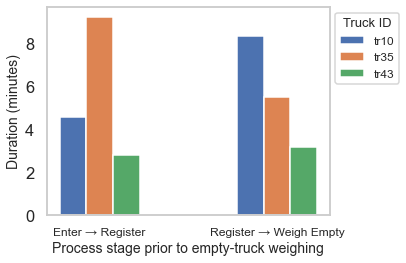

In [138]:
df = plot_df_processed.copy()
stages = df['Stage'].unique()
trucks = df['Truck ID'].unique()
bar_width = 0.15
x = np.arange(len(stages))

label_map = {
    "Enter_RegisterArrival": "Enter → Register",
    "Register_EmptyWeighing": "Register → Weigh Empty"
}
new_labels = [label_map.get(stage, stage) for stage in stages]

fig, ax = plt.subplots(figsize=(6, 4))
for i, truck in enumerate(trucks):
    subset = df[df['Truck ID'] == truck]
    ax.bar(x + i * bar_width, subset['Duration'], width=bar_width, label=truck)


ax.set_xticks(x + bar_width * (len(trucks) - 1) / 2)
ax.set_xticklabels(new_labels,fontsize = 12)
ax.set_ylabel("Duration (minutes)", fontsize = 14)
ax.set_xlabel("Process stage prior to empty-truck weighing", fontsize = 14)
# ax.set_title("Duration of pre-weighing process stages by truck ID ")
ax.legend(
    title="Truck ID",
    fontsize=12,
    title_fontsize=13,
    loc='center left',
    bbox_to_anchor=(1.02, 0.8), 
    borderaxespad=0
)
ax.grid(False)

plt.tight_layout()
fig.savefig('Failed_weighing_path_duration_comparison.png', dpi = 300)
plt.show()

In [140]:
rows = []
with open("TruckGPSRecord.csv", "r", encoding="utf-8") as f:
    for line in f:
        parts = line.strip().split(",")
        if len(parts) == 6:
            rows.append(parts)
df_gps = pd.DataFrame(rows, columns=["GPS_ID", "RFID tag", "Pickup Plan", "Timestamp", "Latitude", "Longitude"])
df_gps["Timestamp"] = pd.to_datetime(df_gps["Timestamp"])
df_gps["Latitude"] = pd.to_numeric(df_gps["Latitude"], errors='coerce')
df_gps["Longitude"] = pd.to_numeric(df_gps["Longitude"], errors='coerce')
df_gps["Date"] = df_gps["Timestamp"].dt.date
df_gps


GPS_ID    RFID tag Pickup Plan           Timestamp  Latitude  \
0      GPS_tr7  rfidXNPCXE       Pcp35 2024-05-02 23:56:35   21.9860   
1      GPS_tr7  rfidXNPCXE       Pcp35 2024-05-02 23:56:40   21.9867   
2      GPS_tr7  rfidXNPCXE       Pcp35 2024-05-02 23:56:45   21.9872   
3      GPS_tr7  rfidXNPCXE       Pcp35 2024-05-02 23:56:50   21.9876   
4      GPS_tr7  rfidXNPCXE       Pcp35 2024-05-02 23:56:55   21.9879   
...        ...         ...         ...                 ...       ...   
38587  GPS_tr8  rfidCEZEBQ      Pcp235 2024-05-31 08:50:05   21.9839   
38588  GPS_tr8  rfidCEZEBQ      Pcp235 2024-05-31 08:50:10   21.9841   
38589  GPS_tr8  rfidCEZEBQ      Pcp235 2024-05-31 08:50:15   21.9843   
38590  GPS_tr8  rfidCEZEBQ      Pcp235 2024-05-31 08:50:20   21.9846   
38591  GPS_tr8  rfidCEZEBQ      Pcp235 2024-05-31 08:50:25   21.9848   

       Longitude        Date  
0       100.4890  2024-05-02  
1       100.4897  2024-05-02  
2       100.4898  2024-05-02  
3       100.4901  2024-05-02  
4       100.4904  2024-05-02  
...          ...         ...  
38587   100.5696  2024-05-31  
38588   100.5696  2024-05-31  
38589   100.5698  2024-05-31  
38590   100.5698  2024-05-31  
38591   100.5700  2024-05-31  

[38592 rows x 7 columns]

In [142]:
path_regions = {
    "entry_to_register": {"lat_min": 21.9860, "lat_max": 21.9940, "lon_min": 100.4890, "lon_max": 100.4930},
    "register_to_weigh": {"lat_min": 21.9945, "lat_max": 22.0005, "lon_min": 100.4950, "lon_max": 100.52},
    "weigh_to_yard":     {"lat_min": 22.0080, "lat_max": 22.0150, "lon_min": 100.5250, "lon_max": 100.5450},
    "yard_to_weigh":     {"lat_min": 21.9880, "lat_max": 22.0075, "lon_min": 100.5555, "lon_max": 100.5650},
    "weigh_to_exit":     {"lat_min": 21.98, "lat_max": 21.9850, "lon_min": 100.5655, "lon_max": 100.5700},
}
def assign_path_stage(row):
    for stage, bounds in path_regions.items():
        if (bounds["lat_min"] <= row["Latitude"] <= bounds["lat_max"] and
            bounds["lon_min"] <= row["Longitude"] <= bounds["lon_max"]):
            return stage
    return "off_path"

df_gps["Path_Stage"] = df.apply(assign_path_stage, axis=1)
df_gps

GPS_ID    RFID tag Pickup Plan           Timestamp  Latitude  \
0      GPS_tr7  rfidXNPCXE       Pcp35 2024-05-02 23:56:35   21.9860   
1      GPS_tr7  rfidXNPCXE       Pcp35 2024-05-02 23:56:40   21.9867   
2      GPS_tr7  rfidXNPCXE       Pcp35 2024-05-02 23:56:45   21.9872   
3      GPS_tr7  rfidXNPCXE       Pcp35 2024-05-02 23:56:50   21.9876   
4      GPS_tr7  rfidXNPCXE       Pcp35 2024-05-02 23:56:55   21.9879   
...        ...         ...         ...                 ...       ...   
38587  GPS_tr8  rfidCEZEBQ      Pcp235 2024-05-31 08:50:05   21.9839   
38588  GPS_tr8  rfidCEZEBQ      Pcp235 2024-05-31 08:50:10   21.9841   
38589  GPS_tr8  rfidCEZEBQ      Pcp235 2024-05-31 08:50:15   21.9843   
38590  GPS_tr8  rfidCEZEBQ      Pcp235 2024-05-31 08:50:20   21.9846   
38591  GPS_tr8  rfidCEZEBQ      Pcp235 2024-05-31 08:50:25   21.9848   

       Longitude        Date         Path_Stage  
0       100.4890  2024-05-02  entry_to_register  
1       100.4897  2024-05-02  entry_to_register  
2       100.4898  2024-05-02  entry_to_register  
3       100.4901  2024-05-02  entry_to_register  
4       100.4904  2024-05-02  entry_to_register  
...          ...         ...                ...  
38587   100.5696  2024-05-31      weigh_to_exit  
38588   100.5696  2024-05-31      weigh_to_exit  
38589   100.5698  2024-05-31      weigh_to_exit  
38590   100.5698  2024-05-31      weigh_to_exit  
38591   100.5700  2024-05-31      weigh_to_exit  

[38592 rows x 8 columns]

In [143]:
truck_df = pd.read_csv('object_Truck.csv')
truck_df = truck_df['ocel_id;ocel_time;ocel_changed_field;RFID No;Pickup Plan ID;Cargo ID;LPT;Axles;Scheduled Pickup Weight;Truck Status;Truck Location Validity;Truck Weight;Truck_Weight_Status'].str.split(';', expand=True)
truck_df.columns = ['ocel_id','ocel_time','ocel_changed_field','RFID No','Pickup Plan ID','Cargo ID','LPT','Axles','Scheduled Pickup Weight','Truck Status','Truck Location Validity','Truck Weight','Truck_Weight_Status']
truck_df.rename(columns={'ocel_id': 'ocel_object_id', 'ocel_time': 'timestamp'}, inplace=True)
valid_rfid_df = truck_df[truck_df['RFID No'].notna() & (truck_df['RFID No'] != '')]
truck_to_rfid = (
    valid_rfid_df[['ocel_object_id', 'RFID No']]
    .drop_duplicates(subset='ocel_object_id', keep='first')
    .set_index('ocel_object_id')['RFID No']
    .to_dict()
)
truck_to_rfid

{'tr24': 'rfidPCMKUV',
 'tr10': 'rfidOOVDPE',
 'tr4': 'rfidTGNSNI',
 'tr14': 'rfidYREIDQ',
 'tr28': 'rfidUOOSAQ',
 'tr50': 'rfidXXIVNB',
 'tr32': 'rfidQCYTDW',
 'tr35': 'rfidPODCVH',
 'tr41': 'rfidXWLCID',
 'tr43': 'rfidGETQDY',
 'tr27': 'rfidWOMLHU',
 'tr11': 'rfidSCPJCE',
 'tr20': 'rfidXPDNSC',
 'tr44': 'rfidJRRVME',
 'tr34': 'rfidFMSUBE',
 'tr25': 'rfidMFTSWW',
 'tr5': 'rfidSVWFVZ',
 'tr3': 'rfidDRCUXI',
 'tr17': 'rfidVYEBVG',
 'tr12': 'rfidVYYKGK',
 'tr29': 'rfidOIGYVC',
 'tr46': 'rfidEJHYOM',
 'tr33': 'rfidMVJRXE',
 'tr37': 'rfidUSNSHC',
 'tr23': 'rfidKGKHYU',
 'tr49': 'rfidNJSWIM',
 'tr16': 'rfidIICVAH',
 'tr15': 'rfidIDWLCS',
 'tr40': 'rfidZEKWJR',
 'tr18': 'rfidEGNSMV',
 'tr1': 'rfidBKTRLP',
 'tr7': 'rfidXNPCXE',
 'tr39': 'rfidYGABPB',
 'tr22': 'rfidENJOLW',
 'tr38': 'rfidVIASXP',
 'tr21': 'rfidTLWXGZ',
 'tr36': 'rfidHYTHBN',
 'tr26': 'rfidNQRMLR',
 'tr45': 'rfidSLQPDR',
 'tr9': 'rfidKEBJGC',
 'tr47': 'rfidJGLUGP',
 'tr13': 'rfidGTHHGD',
 'tr30': 'rfidCBMLGM',
 'tr2': 'rfidSQKJ

In [144]:
df_gps['RFID tag'] = df_gps['RFID tag'].astype(str).str.strip()
rfid_to_truck = {v.strip(): k for k, v in truck_to_rfid.items() if isinstance(v, str)}
df_gps['Truck ID'] = df_gps['RFID tag'].map(rfid_to_truck)
df_gps = df_gps.rename(columns={'Pickup Plan':'Pickup Plan ID'})
df_gps


GPS_ID    RFID tag Pickup Plan ID           Timestamp  Latitude  \
0      GPS_tr7  rfidXNPCXE          Pcp35 2024-05-02 23:56:35   21.9860   
1      GPS_tr7  rfidXNPCXE          Pcp35 2024-05-02 23:56:40   21.9867   
2      GPS_tr7  rfidXNPCXE          Pcp35 2024-05-02 23:56:45   21.9872   
3      GPS_tr7  rfidXNPCXE          Pcp35 2024-05-02 23:56:50   21.9876   
4      GPS_tr7  rfidXNPCXE          Pcp35 2024-05-02 23:56:55   21.9879   
...        ...         ...            ...                 ...       ...   
38587  GPS_tr8  rfidCEZEBQ         Pcp235 2024-05-31 08:50:05   21.9839   
38588  GPS_tr8  rfidCEZEBQ         Pcp235 2024-05-31 08:50:10   21.9841   
38589  GPS_tr8  rfidCEZEBQ         Pcp235 2024-05-31 08:50:15   21.9843   
38590  GPS_tr8  rfidCEZEBQ         Pcp235 2024-05-31 08:50:20   21.9846   
38591  GPS_tr8  rfidCEZEBQ         Pcp235 2024-05-31 08:50:25   21.9848   

       Longitude        Date         Path_Stage Truck ID  
0       100.4890  2024-05-02  entry_to_register      tr7  
1       100.4897  2024-05-02  entry_to_register      tr7  
2       100.4898  2024-05-02  entry_to_register      tr7  
3       100.4901  2024-05-02  entry_to_register      tr7  
4       100.4904  2024-05-02  entry_to_register      tr7  
...          ...         ...                ...      ...  
38587   100.5696  2024-05-31      weigh_to_exit      tr8  
38588   100.5696  2024-05-31      weigh_to_exit      tr8  
38589   100.5698  2024-05-31      weigh_to_exit      tr8  
38590   100.5698  2024-05-31      weigh_to_exit      tr8  
38591   100.5700  2024-05-31      weigh_to_exit      tr8  

[38592 rows x 9 columns]

In [147]:
pickup_mapping = all_pickups[['Truck ID', 'Pickup Plan ID', 'pickup']].drop_duplicates()
pickup_mapping

Truck ID Pickup Plan ID  pickup
0          tr1         Pcp404     1.0
97         tr1         Pcp451     2.0
148        tr1         Pcp207     3.0
217        tr1         Pcp485     4.0
293        tr1         Pcp398     5.0
...        ...            ...     ...
35702      tr9          Pcp74   485.0
35781      tr9         Pcp464   486.0
35862      tr9         Pcp291   487.0
35931      tr9         Pcp478   488.0
36005      tr9         Pcp267   489.0

[489 rows x 3 columns]

In [148]:
df_gps = df_gps.merge(pickup_mapping, on=['Truck ID', 'Pickup Plan ID'], how='left')
df_gps

GPS_ID    RFID tag Pickup Plan ID           Timestamp  Latitude  \
0      GPS_tr7  rfidXNPCXE          Pcp35 2024-05-02 23:56:35   21.9860   
1      GPS_tr7  rfidXNPCXE          Pcp35 2024-05-02 23:56:40   21.9867   
2      GPS_tr7  rfidXNPCXE          Pcp35 2024-05-02 23:56:45   21.9872   
3      GPS_tr7  rfidXNPCXE          Pcp35 2024-05-02 23:56:50   21.9876   
4      GPS_tr7  rfidXNPCXE          Pcp35 2024-05-02 23:56:55   21.9879   
...        ...         ...            ...                 ...       ...   
39424  GPS_tr8  rfidCEZEBQ         Pcp235 2024-05-31 08:50:05   21.9839   
39425  GPS_tr8  rfidCEZEBQ         Pcp235 2024-05-31 08:50:10   21.9841   
39426  GPS_tr8  rfidCEZEBQ         Pcp235 2024-05-31 08:50:15   21.9843   
39427  GPS_tr8  rfidCEZEBQ         Pcp235 2024-05-31 08:50:20   21.9846   
39428  GPS_tr8  rfidCEZEBQ         Pcp235 2024-05-31 08:50:25   21.9848   

       Longitude        Date         Path_Stage Truck ID  pickup_x  pickup_y  
0       100.4890  2024-05-02  entry_to_register      tr7     457.0     457.0  
1       100.4897  2024-05-02  entry_to_register      tr7     457.0     457.0  
2       100.4898  2024-05-02  entry_to_register      tr7     457.0     457.0  
3       100.4901  2024-05-02  entry_to_register      tr7     457.0     457.0  
4       100.4904  2024-05-02  entry_to_register      tr7     457.0     457.0  
...          ...         ...                ...      ...       ...       ...  
39424   100.5696  2024-05-31      weigh_to_exit      tr8     479.0     479.0  
39425   100.5696  2024-05-31      weigh_to_exit      tr8     479.0     479.0  
39426   100.5698  2024-05-31      weigh_to_exit      tr8     479.0     479.0  
39427   100.5698  2024-05-31      weigh_to_exit      tr8     479.0     479.0  
39428   100.5700  2024-05-31      weigh_to_exit      tr8     479.0     479.0  

[39429 rows x 11 columns]

In [149]:
df_gps['pickup'] = df_gps['pickup_y']
df_gps = df_gps.drop(columns=['pickup_x', 'pickup_y'])
df_gps

GPS_ID    RFID tag Pickup Plan ID           Timestamp  Latitude  \
0      GPS_tr7  rfidXNPCXE          Pcp35 2024-05-02 23:56:35   21.9860   
1      GPS_tr7  rfidXNPCXE          Pcp35 2024-05-02 23:56:40   21.9867   
2      GPS_tr7  rfidXNPCXE          Pcp35 2024-05-02 23:56:45   21.9872   
3      GPS_tr7  rfidXNPCXE          Pcp35 2024-05-02 23:56:50   21.9876   
4      GPS_tr7  rfidXNPCXE          Pcp35 2024-05-02 23:56:55   21.9879   
...        ...         ...            ...                 ...       ...   
39424  GPS_tr8  rfidCEZEBQ         Pcp235 2024-05-31 08:50:05   21.9839   
39425  GPS_tr8  rfidCEZEBQ         Pcp235 2024-05-31 08:50:10   21.9841   
39426  GPS_tr8  rfidCEZEBQ         Pcp235 2024-05-31 08:50:15   21.9843   
39427  GPS_tr8  rfidCEZEBQ         Pcp235 2024-05-31 08:50:20   21.9846   
39428  GPS_tr8  rfidCEZEBQ         Pcp235 2024-05-31 08:50:25   21.9848   

       Longitude        Date         Path_Stage Truck ID  pickup  
0       100.4890  2024-05-02  entry_to_register      tr7   457.0  
1       100.4897  2024-05-02  entry_to_register      tr7   457.0  
2       100.4898  2024-05-02  entry_to_register      tr7   457.0  
3       100.4901  2024-05-02  entry_to_register      tr7   457.0  
4       100.4904  2024-05-02  entry_to_register      tr7   457.0  
...          ...         ...                ...      ...     ...  
39424   100.5696  2024-05-31      weigh_to_exit      tr8   479.0  
39425   100.5696  2024-05-31      weigh_to_exit      tr8   479.0  
39426   100.5698  2024-05-31      weigh_to_exit      tr8   479.0  
39427   100.5698  2024-05-31      weigh_to_exit      tr8   479.0  
39428   100.5700  2024-05-31      weigh_to_exit      tr8   479.0  

[39429 rows x 10 columns]

In [150]:
failedWeighedGPS = df_gps[df_gps['pickup'].isin(failed_weigh_ids)]
failedWeighedGPS

GPS_ID    RFID tag Pickup Plan ID           Timestamp  Latitude  \
722   GPS_tr10  rfidOOVDPE         Pcp385 2024-05-06 04:50:39   21.9860   
727   GPS_tr10  rfidOOVDPE         Pcp385 2024-05-06 04:50:44   21.9870   
730   GPS_tr10  rfidOOVDPE         Pcp385 2024-05-06 04:50:49   21.9875   
736   GPS_tr10  rfidOOVDPE         Pcp385 2024-05-06 04:50:54   21.9879   
740   GPS_tr10  rfidOOVDPE         Pcp385 2024-05-06 04:50:59   21.9885   
...        ...         ...            ...                 ...       ...   
1140  GPS_tr35  rfidPODCVH         Pcp385 2024-05-06 05:06:58   21.9985   
1141  GPS_tr35  rfidPODCVH         Pcp385 2024-05-06 05:07:03   21.9990   
1142  GPS_tr35  rfidPODCVH         Pcp385 2024-05-06 05:07:08   21.9993   
1143  GPS_tr35  rfidPODCVH         Pcp385 2024-05-06 05:07:13   21.9999   
1144  GPS_tr35  rfidPODCVH         Pcp385 2024-05-06 05:07:18   22.0005   

      Longitude        Date         Path_Stage Truck ID  pickup  
722    100.4890  2024-05-06  entry_to_register     tr10    11.0  
727    100.4897  2024-05-06  entry_to_register     tr10    11.0  
730    100.4902  2024-05-06  entry_to_register     tr10    11.0  
736    100.4906  2024-05-06  entry_to_register     tr10    11.0  
740    100.4908  2024-05-06  entry_to_register     tr10    11.0  
...         ...         ...                ...      ...     ...  
1140   100.5168  2024-05-06  register_to_weigh     tr35   271.0  
1141   100.5179  2024-05-06  register_to_weigh     tr35   271.0  
1142   100.5189  2024-05-06  register_to_weigh     tr35   271.0  
1143   100.5199  2024-05-06  register_to_weigh     tr35   271.0  
1144   100.5200  2024-05-06  register_to_weigh     tr35   271.0  

[95 rows x 10 columns]

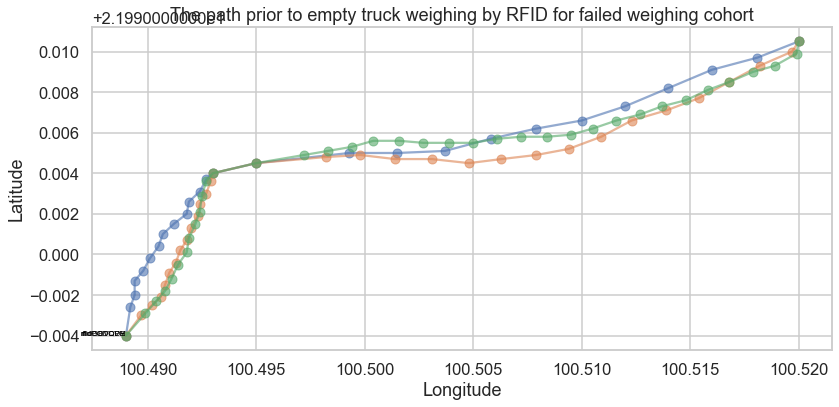

In [155]:
plt.figure(figsize=(12, 6))

for rfid, group in failedWeighedGPS.groupby("RFID tag"):
    group = group.sort_values("Timestamp")  
    lons = group["Longitude"].to_numpy()
    lats = group["Latitude"].to_numpy()

    plt.plot(lons, lats, linestyle='-', marker='o', alpha=0.6)

    plt.text(lons[0], lats[0], str(rfid), fontsize=8, color="black", ha='right')

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("The path prior to empty truck weighing by RFID for failed weighing cohort")
plt.grid(True)
plt.tight_layout()
plt.show()

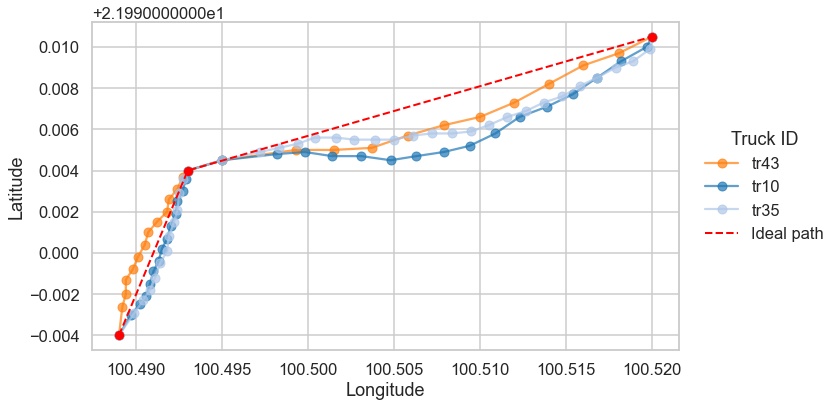

In [235]:
plt.figure(figsize=(12, 6))

truck_ids = failedWeighedGPS['Truck ID'].unique()
palette = sns.color_palette('tab20', n_colors=max(20, len(truck_ids)))
colors = {tid: palette[i % len(palette)] for i, tid in enumerate(truck_ids)}

for rfid, group in failedWeighedGPS.groupby("RFID tag"):
    group = group.sort_values("Timestamp")
    truck_id = group['Truck ID'].iloc[0]  
    lons = group["Longitude"].to_numpy()
    lats = group["Latitude"].to_numpy()
    # plt.plot(lons, lats, linestyle='-', marker='o', alpha=0.6)
    plt.plot(lons, lats, linestyle='-', marker='o', alpha=0.7,
             color=colors[truck_id], label=str(truck_id))
    # plt.text(group["Longitude"].iloc[0], group["Latitude"].iloc[0],
    #          str(rfid), fontsize=8, color=colors[rfid], ha='right')
    # plt.text(lons[0], lats[0], str(rfid), fontsize=8, color="black", ha='right')

route = ['entry_to_register', 'register_to_weigh']  
pts = []
for i, st in enumerate(route):
    c = path_regions[st]
    if i == 0:  
        pts.append((c['lon_min'], c['lat_min']))
    pts.append((c['lon_max'], c['lat_max']))

ideal_lons, ideal_lats = zip(*pts)
plt.plot(ideal_lons, ideal_lats, '--', color='red', linewidth=2, label='Ideal path')
plt.scatter(ideal_lons, ideal_lats, c='red', s=60, zorder=5)

plt.xlabel("Longitude"); plt.ylabel("Latitude")
# plt.title("Actual path vs. ideal 3-point route")
plt.legend(loc='center left', bbox_to_anchor=(1.02, 0.5),
           frameon=False, title="Truck ID")
plt.grid(True);  

plt.tight_layout(); 
plt.savefig('failedWeight_path.png', dpi = 300)
plt.show()


In [204]:
df_success_pickups = pd.read_csv('All_success_pickups.csv')
df_success_pickups_filtered = df_success_pickups[['pickup','Truck ID','Enter_to_Register_TTL_count','Register_to_WeighEmpty_TTL_count','WeighEmpty_to_ArriveSilo_TTL_count','Stack_Loaded_TTL_count','WeighLoaded_to_Exit_TTL_count']]
df_success_pickups_filtered = df_success_pickups_filtered.drop_duplicates()
df_success_pickups_filtered

pickup Truck ID  Enter_to_Register_TTL_count  \
0         1.0      tr1                           16   
97        3.0      tr1                           11   
166       4.0      tr1                           15   
242       5.0      tr1                            9   
318       6.0      tr1                           12   
...       ...      ...                          ...   
34118   485.0      tr9                           11   
34197   486.0      tr9                           12   
34278   487.0      tr9                            7   
34347   488.0      tr9                           15   
34421   489.0      tr9                           10   

       Register_to_WeighEmpty_TTL_count  WeighEmpty_to_ArriveSilo_TTL_count  \
0                                    21                                  16   
97                                    5                                  12   
166                                   6                                   9   
242                                  21                                   8   
318                                  13                                   6   
...                                 ...                                 ...   
34118                                17                                  20   
34197                                 5                                  23   
34278                                14                                  11   
34347                                10                                  15   
34421                                24                                  16   

       Stack_Loaded_TTL_count  WeighLoaded_to_Exit_TTL_count  
0                           9                             19  
97                         16                              9  
166                        13                             17  
242                        14                              8  
318                        11                             12  
...                       ...                            ...  
34118                       6                              8  
34197                      11                             14  
34278                      17                              4  
34347                       9                              9  
34421                       9                              7  

[454 rows x 7 columns]

In [194]:
df_success_pickups_ids = df_success_pickups['pickup'].unique()
df_gps_success = df_gps[df_gps['pickup'].isin(df_success_pickups_ids)]
df_gps_success

GPS_ID    RFID tag Pickup Plan ID           Timestamp  Latitude  \
0      GPS_tr7  rfidXNPCXE          Pcp35 2024-05-02 23:56:35   21.9860   
1      GPS_tr7  rfidXNPCXE          Pcp35 2024-05-02 23:56:40   21.9867   
2      GPS_tr7  rfidXNPCXE          Pcp35 2024-05-02 23:56:45   21.9872   
3      GPS_tr7  rfidXNPCXE          Pcp35 2024-05-02 23:56:50   21.9876   
4      GPS_tr7  rfidXNPCXE          Pcp35 2024-05-02 23:56:55   21.9879   
...        ...         ...            ...                 ...       ...   
39424  GPS_tr8  rfidCEZEBQ         Pcp235 2024-05-31 08:50:05   21.9839   
39425  GPS_tr8  rfidCEZEBQ         Pcp235 2024-05-31 08:50:10   21.9841   
39426  GPS_tr8  rfidCEZEBQ         Pcp235 2024-05-31 08:50:15   21.9843   
39427  GPS_tr8  rfidCEZEBQ         Pcp235 2024-05-31 08:50:20   21.9846   
39428  GPS_tr8  rfidCEZEBQ         Pcp235 2024-05-31 08:50:25   21.9848   

       Longitude        Date         Path_Stage Truck ID  pickup  
0       100.4890  2024-05-02  entry_to_register      tr7   457.0  
1       100.4897  2024-05-02  entry_to_register      tr7   457.0  
2       100.4898  2024-05-02  entry_to_register      tr7   457.0  
3       100.4901  2024-05-02  entry_to_register      tr7   457.0  
4       100.4904  2024-05-02  entry_to_register      tr7   457.0  
...          ...         ...                ...      ...     ...  
39424   100.5696  2024-05-31      weigh_to_exit      tr8   479.0  
39425   100.5696  2024-05-31      weigh_to_exit      tr8   479.0  
39426   100.5698  2024-05-31      weigh_to_exit      tr8   479.0  
39427   100.5698  2024-05-31      weigh_to_exit      tr8   479.0  
39428   100.5700  2024-05-31      weigh_to_exit      tr8   479.0  

[37812 rows x 10 columns]

In [223]:
df_success_pickups_long_entry_register_ids = df_success_pickups_filtered[df_success_pickups_filtered['Enter_to_Register_TTL_count'] > 20]['pickup']
df_success_pickups_long_entry_register_ids

3576      53.0
4051      61.0
11917    168.0
15593    218.0
25505    360.0
33825    481.0
Name: pickup, dtype: float64

In [228]:
df_success_pickups_long_entry_register = df_gps_success[df_gps_success['pickup'].isin(df_success_pickups_long_entry_register_ids)]
df_success_pickups_long_entry_register_filtered = df_success_pickups_long_entry_register[df_success_pickups_long_entry_register['Path_Stage'] == 'entry_to_register']

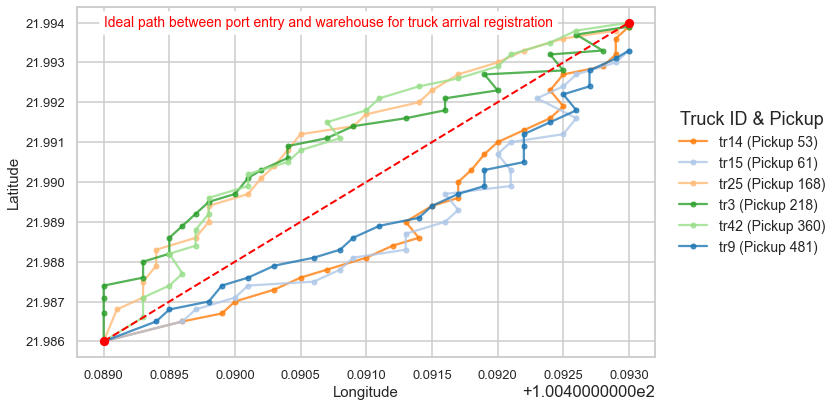

In [447]:
df = df_success_pickups_long_entry_register_filtered.copy()

plt.figure(figsize=(12, 6))

combo_ids = df[['Truck ID', 'pickup']].dropna().drop_duplicates()
palette = sns.color_palette('tab20', n_colors=max(20, len(combo_ids)))
color_map = {tuple(row): palette[i % len(palette)] for i, row in enumerate(combo_ids.to_numpy())}

for (tid, pid), g in df.groupby(['Truck ID', 'pickup']):
    g = g.sort_values('Timestamp')
    lons = g['Longitude'].to_numpy()
    lats = g['Latitude'].to_numpy()

    plt.plot(
        lons, lats,
        linestyle='-',
        marker='o', markersize=5,
        alpha=0.8,
        color=color_map.get((tid, pid), 'gray'),
        label=f"{tid} (Pickup {int(pid)})"
    )

route = ['entry_to_register']
pts = []
for i, st in enumerate(route):
    c = path_regions[st]
    if i == 0:
        pts.append((c['lon_min'], c['lat_min']))
    pts.append((c['lon_max'], c['lat_max']))

ideal_lons, ideal_lats = zip(*pts)
plt.plot(ideal_lons, ideal_lats, '--', color='red', linewidth=2)
plt.scatter(ideal_lons, ideal_lats, c='red', s=60, zorder=5)


mid = len(ideal_lons) // 2
plt.text(
    ideal_lons[mid] - 0.004, ideal_lats[mid],
    'Ideal path between port entry and warehouse for truck arrival registration',
    color='red', fontsize=14, va='center', ha='left',
    backgroundcolor='white'
)

plt.xlabel("Longitude",fontsize =15)
plt.ylabel("Latitude",fontsize =15)
plt.tick_params(axis='x', labelsize=13)
plt.tick_params(axis='y', labelsize=13)
plt.legend(loc='center left', bbox_to_anchor=(1.02, 0.5),
           frameon=False, title="Truck ID & Pickup", fontsize = 14)
plt.grid(True)
plt.tight_layout()
plt.savefig('bad_pickups_entry_warehouse.png', dpi = 300)
plt.show()

In [246]:
df_success_pickups_long_register_empty_ids = df_success_pickups_filtered[df_success_pickups_filtered['Register_to_WeighEmpty_TTL_count'] > 23]['pickup']
df_success_pickups_long_register_empty_ids

6547      95.0
7560     109.0
14209    199.0
19659    282.0
23501    335.0
23584    336.0
29170    415.0
30923    439.0
33733    480.0
34421    489.0
Name: pickup, dtype: float64

In [247]:
df_success_pickups_long_register_empty = df_gps_success[df_gps_success['pickup'].isin(df_success_pickups_long_register_empty_ids)]
df_success_pickups_long_register_empty_filtered = df_success_pickups_long_register_empty[df_success_pickups_long_register_empty['Path_Stage'] == 'register_to_weigh']

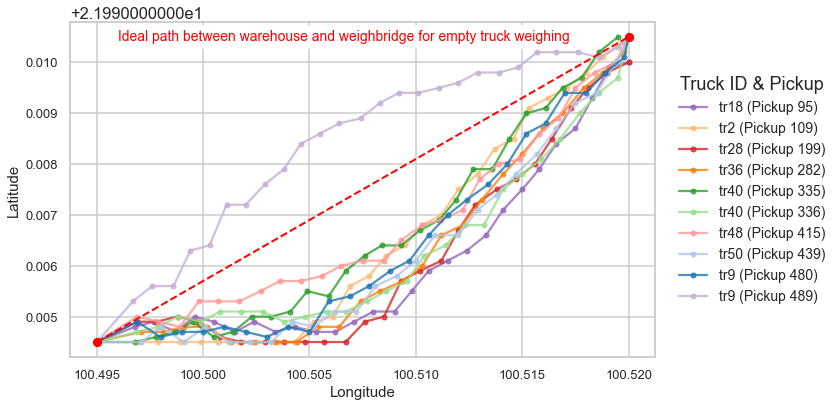

In [448]:
df = df_success_pickups_long_register_empty_filtered.copy()

plt.figure(figsize=(12, 6))

combo_ids = df[['Truck ID', 'pickup']].dropna().drop_duplicates()
palette = sns.color_palette('tab20', n_colors=max(20, len(combo_ids)))
color_map = {tuple(row): palette[i % len(palette)] for i, row in enumerate(combo_ids.to_numpy())}

for (tid, pid), g in df.groupby(['Truck ID', 'pickup']):
    g = g.sort_values('Timestamp')
    lons = g['Longitude'].to_numpy()
    lats = g['Latitude'].to_numpy()

    plt.plot(
        lons, lats,
        linestyle='-',
        marker='o', markersize=5,
        alpha=0.8,
        color=color_map.get((tid, pid), 'gray'),
        label=f"{tid} (Pickup {int(pid)})"
    )

route = ['register_to_weigh']
pts = []
for i, st in enumerate(route):
    c = path_regions[st]
    if i == 0:
        pts.append((c['lon_min'], c['lat_min']))
    pts.append((c['lon_max'], c['lat_max']))

ideal_lons, ideal_lats = zip(*pts)
plt.plot(ideal_lons, ideal_lats, '--', color='red', linewidth=2)
plt.scatter(ideal_lons, ideal_lats, c='red', s=60, zorder=5)


mid = len(ideal_lons) // 2
plt.text(
    ideal_lons[mid] - 0.024, ideal_lats[mid],
    'Ideal path between warehouse and weighbridge for empty truck weighing',
    color='red', fontsize=14, va='center', ha='left',
    backgroundcolor='white'
)

plt.xlabel("Longitude",fontsize =15)
plt.ylabel("Latitude",fontsize =15)
plt.tick_params(axis='x', labelsize=13)
plt.tick_params(axis='y', labelsize=13)
plt.legend(loc='center left', bbox_to_anchor=(1.02, 0.5),
           frameon=False, title="Truck ID & Pickup", fontsize = 14)
plt.grid(True)
plt.tight_layout()
plt.savefig('bad_pickups_warehouse_emptyweighing.png', dpi = 300)
plt.show()

In [219]:
df_success_pickups_long_empty_silo_ids = df_success_pickups_filtered[df_success_pickups_filtered['WeighEmpty_to_ArriveSilo_TTL_count'] > 23]['pickup']
df_success_pickups_long_empty_silo_ids 

1271      20.0
6547      95.0
8489     121.0
8729     124.0
12071    170.0
33492    476.0
Name: pickup, dtype: float64

In [236]:
df_success_pickups_long_empty_silo = df_gps_success[df_gps_success['pickup'].isin(df_success_pickups_long_empty_silo_ids)]
df_success_pickups_long_empty_silo_filtered = df_success_pickups_long_empty_silo[df_success_pickups_long_empty_silo['Path_Stage'] == 'weigh_to_yard']

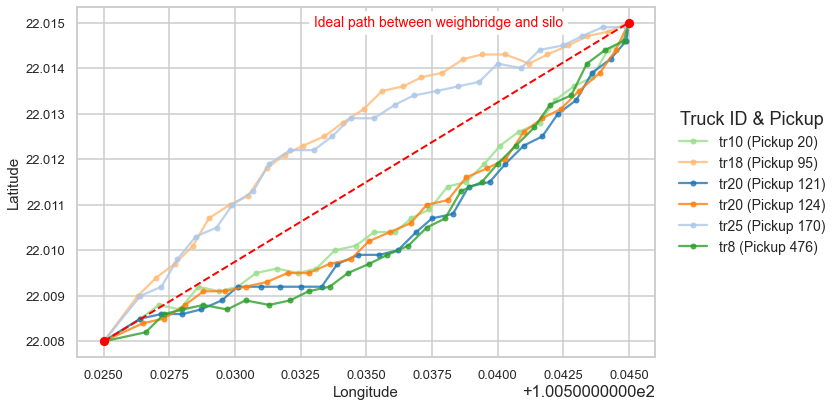

In [449]:
df = df_success_pickups_long_empty_silo_filtered.copy()

plt.figure(figsize=(12, 6))

combo_ids = df[['Truck ID', 'pickup']].dropna().drop_duplicates()
palette = sns.color_palette('tab20', n_colors=max(20, len(combo_ids)))
color_map = {tuple(row): palette[i % len(palette)] for i, row in enumerate(combo_ids.to_numpy())}

for (tid, pid), g in df.groupby(['Truck ID', 'pickup']):
    g = g.sort_values('Timestamp')
    lons = g['Longitude'].to_numpy()
    lats = g['Latitude'].to_numpy()

    plt.plot(
        lons, lats,
        linestyle='-',
        marker='o', markersize=5,
        alpha=0.8,
        color=color_map.get((tid, pid), 'gray'),
        label=f"{tid} (Pickup {int(pid)})"
    )

route = ['weigh_to_yard']
pts = []
for i, st in enumerate(route):
    c = path_regions[st]
    if i == 0:
        pts.append((c['lon_min'], c['lat_min']))
    pts.append((c['lon_max'], c['lat_max']))

ideal_lons, ideal_lats = zip(*pts)
plt.plot(ideal_lons, ideal_lats, '--', color='red', linewidth=2)
plt.scatter(ideal_lons, ideal_lats, c='red', s=60, zorder=5)


mid = len(ideal_lons) // 2
plt.text(
    ideal_lons[mid] - 0.012, ideal_lats[mid],
    'Ideal path between weighbridge and silo',
    color='red', fontsize=14, va='center', ha='left',
    backgroundcolor='white'
)

plt.xlabel("Longitude",fontsize =15)
plt.ylabel("Latitude",fontsize =15)
plt.tick_params(axis='x', labelsize=13)
plt.tick_params(axis='y', labelsize=13)
plt.legend(loc='center left', bbox_to_anchor=(1.02, 0.5),
           frameon=False, title="Truck ID & Pickup", fontsize = 14)
plt.grid(True)
plt.tight_layout()
plt.savefig('bad_pickups_emptyweighing_silo.png', dpi = 300)
plt.show()

In [221]:
df_success_pickups_long_silo_loaded_ids = df_success_pickups_filtered[df_success_pickups_filtered['Stack_Loaded_TTL_count'] > 23]['pickup']
df_success_pickups_long_silo_loaded_ids

3576      53.0
4209      63.0
12817    180.0
15286    214.0
24136    343.0
30450    432.0
31336    444.0
Name: pickup, dtype: float64

In [239]:
df_success_pickups_long_silo_loaded = df_gps_success[df_gps_success['pickup'].isin(df_success_pickups_long_silo_loaded_ids)]
df_success_pickups_long_silo_loaded_filtered = df_success_pickups_long_silo_loaded[df_success_pickups_long_silo_loaded['Path_Stage'] == 'yard_to_weigh']

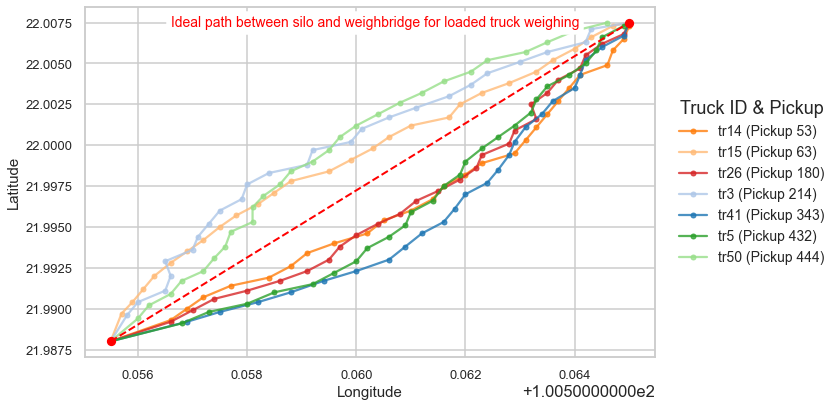

In [450]:
df = df_success_pickups_long_silo_loaded_filtered.copy()

plt.figure(figsize=(12, 6))

combo_ids = df[['Truck ID', 'pickup']].dropna().drop_duplicates()
palette = sns.color_palette('tab20', n_colors=max(20, len(combo_ids)))
color_map = {tuple(row): palette[i % len(palette)] for i, row in enumerate(combo_ids.to_numpy())}

for (tid, pid), g in df.groupby(['Truck ID', 'pickup']):
    g = g.sort_values('Timestamp')
    lons = g['Longitude'].to_numpy()
    lats = g['Latitude'].to_numpy()

    plt.plot(
        lons, lats,
        linestyle='-',
        marker='o', markersize=5,
        alpha=0.8,
        color=color_map.get((tid, pid), 'gray'),
        label=f"{tid} (Pickup {int(pid)})"
    )

route = ['yard_to_weigh']
pts = []
for i, st in enumerate(route):
    c = path_regions[st]
    if i == 0:
        pts.append((c['lon_min'], c['lat_min']))
    pts.append((c['lon_max'], c['lat_max']))

ideal_lons, ideal_lats = zip(*pts)
plt.plot(ideal_lons, ideal_lats, '--', color='red', linewidth=2)
plt.scatter(ideal_lons, ideal_lats, c='red', s=60, zorder=5)


mid = len(ideal_lons) // 2
plt.text(
    ideal_lons[mid] - 0.0084, ideal_lats[mid],
    'Ideal path between silo and weighbridge for loaded truck weighing',
    color='red', fontsize=14, va='center', ha='left',
    backgroundcolor='white'
)

plt.xlabel("Longitude",fontsize =15)
plt.ylabel("Latitude",fontsize =15)
plt.tick_params(axis='x', labelsize=13)
plt.tick_params(axis='y', labelsize=13)
plt.legend(loc='center left', bbox_to_anchor=(1.02, 0.5),
           frameon=False, title="Truck ID & Pickup", fontsize = 14)
plt.grid(True)
plt.tight_layout()
plt.savefig('bad_pickups_silo_loadedweighing.png', dpi = 300)
plt.show()


In [225]:
df_success_pickups_long_loaded_exit_ids = df_success_pickups_filtered[df_success_pickups_filtered['WeighLoaded_to_Exit_TTL_count'] > 20]['pickup']
df_success_pickups_long_loaded_exit_ids

2931      45.0
3181      48.0
16034    226.0
16176    228.0
16357    230.0
27691    393.0
29088    414.0
Name: pickup, dtype: float64

In [241]:
df_success_pickups_long_loaded_exit = df_gps_success[df_gps_success['pickup'].isin(df_success_pickups_long_loaded_exit_ids)]
df_success_pickups_long_loaded_exit_filtered = df_success_pickups_long_loaded_exit[df_success_pickups_long_loaded_exit['Path_Stage'] == 'weigh_to_exit']

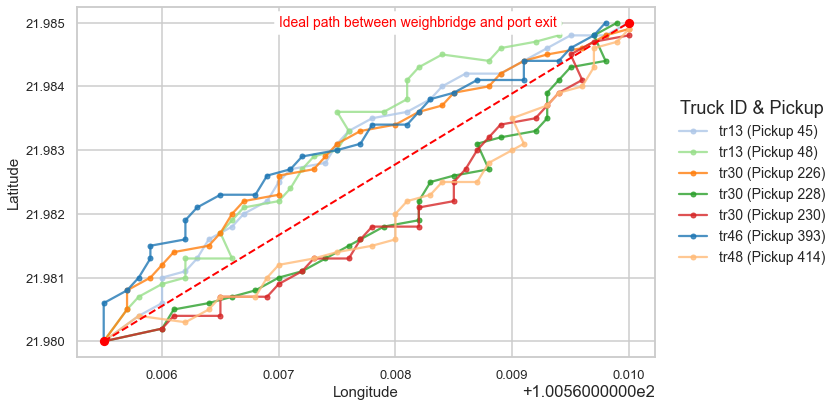

In [451]:
df = df_success_pickups_long_loaded_exit_filtered.copy()

plt.figure(figsize=(12, 6))

combo_ids = df[['Truck ID', 'pickup']].dropna().drop_duplicates()
palette = sns.color_palette('tab20', n_colors=max(20, len(combo_ids)))
color_map = {tuple(row): palette[i % len(palette)] for i, row in enumerate(combo_ids.to_numpy())}

for (tid, pid), g in df.groupby(['Truck ID', 'pickup']):
    g = g.sort_values('Timestamp')
    lons = g['Longitude'].to_numpy()
    lats = g['Latitude'].to_numpy()

    plt.plot(
        lons, lats,
        linestyle='-',
        marker='o', markersize=5,
        alpha=0.8,
        color=color_map.get((tid, pid), 'gray'),
        label=f"{tid} (Pickup {int(pid)})"
    )

route = ['weigh_to_exit']
pts = []
for i, st in enumerate(route):
    c = path_regions[st]
    if i == 0:
        pts.append((c['lon_min'], c['lat_min']))
    pts.append((c['lon_max'], c['lat_max']))

ideal_lons, ideal_lats = zip(*pts)
plt.plot(ideal_lons, ideal_lats, '--', color='red', linewidth=2)
plt.scatter(ideal_lons, ideal_lats, c='red', s=60, zorder=5)


mid = len(ideal_lons) // 2
plt.text(
    ideal_lons[mid] - 0.003, ideal_lats[mid],
    'Ideal path between weighbridge and port exit',
    color='red', fontsize=14, va='center', ha='left',
    backgroundcolor='white'
)

plt.xlabel("Longitude",fontsize =15)
plt.ylabel("Latitude",fontsize =15)
plt.tick_params(axis='x', labelsize=13)
plt.tick_params(axis='y', labelsize=13)
plt.legend(loc='center left', bbox_to_anchor=(1.02, 0.5),
           frameon=False, title="Truck ID & Pickup", fontsize = 14)
plt.grid(True)
plt.tight_layout()
plt.savefig('bad_pickups_loadedweighing_exit.png', dpi = 300)
plt.show()


In [269]:
df_success_pickups_filtered

pickup Truck ID  Enter_to_Register_TTL_count  \
0         1.0      tr1                           16   
97        3.0      tr1                           11   
166       4.0      tr1                           15   
242       5.0      tr1                            9   
318       6.0      tr1                           12   
...       ...      ...                          ...   
34118   485.0      tr9                           11   
34197   486.0      tr9                           12   
34278   487.0      tr9                            7   
34347   488.0      tr9                           15   
34421   489.0      tr9                           10   

       Register_to_WeighEmpty_TTL_count  WeighEmpty_to_ArriveSilo_TTL_count  \
0                                    21                                  16   
97                                    5                                  12   
166                                   6                                   9   
242                                  21                                   8   
318                                  13                                   6   
...                                 ...                                 ...   
34118                                17                                  20   
34197                                 5                                  23   
34278                                14                                  11   
34347                                10                                  15   
34421                                24                                  16   

       Stack_Loaded_TTL_count  WeighLoaded_to_Exit_TTL_count  
0                           9                             19  
97                         16                              9  
166                        13                             17  
242                        14                              8  
318                        11                             12  
...                       ...                            ...  
34118                       6                              8  
34197                      11                             14  
34278                      17                              4  
34347                       9                              9  
34421                       9                              7  

[454 rows x 7 columns]

In [268]:
THR = {
    'Enter_to_Register_TTL_count':        20,
    'Register_to_WeighEmpty_TTL_count':   23,
    'WeighEmpty_to_ArriveSilo_TTL_count': 23,
    'Stack_Loaded_TTL_count':             23,
    'WeighLoaded_to_Exit_TTL_count':      20,
}
PATH_COLS = list(THR.keys())

df_agg = df_success_pickups_filtered.copy()
df_agg[PATH_COLS] = df_agg[PATH_COLS].apply(pd.to_numeric, errors='coerce').fillna(0)

mask_df = pd.DataFrame({c: df_agg[c].gt(THR[c]) for c in PATH_COLS}, index=df_agg.index)
df_agg['is_unexpected'] = mask_df.any(axis=1)
df_agg['exceeded_paths'] = mask_df.apply(lambda r: [c for c, v in r.items() if v], axis=1)
unexpected = df_agg[df_agg['is_unexpected']]
bad_pickups = set(unexpected['pickup'])
print(f'Number of pickups with abnormal route: {len(bad_pickups)}')
unexpected[['pickup','Truck ID','exceeded_paths']]

Number of pickups with abnormal route: 34


pickup Truck ID                                     exceeded_paths
1271     20.0     tr10               [WeighEmpty_to_ArriveSilo_TTL_count]
2931     45.0     tr13                    [WeighLoaded_to_Exit_TTL_count]
3181     48.0     tr13                    [WeighLoaded_to_Exit_TTL_count]
3576     53.0     tr14  [Enter_to_Register_TTL_count, Stack_Loaded_TTL...
4051     61.0     tr15                      [Enter_to_Register_TTL_count]
4209     63.0     tr15                           [Stack_Loaded_TTL_count]
6547     95.0     tr18  [Register_to_WeighEmpty_TTL_count, WeighEmpty_...
7560    109.0      tr2                 [Register_to_WeighEmpty_TTL_count]
8489    121.0     tr20               [WeighEmpty_to_ArriveSilo_TTL_count]
8729    124.0     tr20               [WeighEmpty_to_ArriveSilo_TTL_count]
11917   168.0     tr25                      [Enter_to_Register_TTL_count]
12071   170.0     tr25               [WeighEmpty_to_ArriveSilo_TTL_count]
12817   180.0     tr26                           [Stack_Loaded_TTL_count]
14209   199.0     tr28                 [Register_to_WeighEmpty_TTL_count]
15286   214.0      tr3                           [Stack_Loaded_TTL_count]
15593   218.0      tr3                      [Enter_to_Register_TTL_count]
16034   226.0     tr30                    [WeighLoaded_to_Exit_TTL_count]
16176   228.0     tr30                    [WeighLoaded_to_Exit_TTL_count]
16357   230.0     tr30                    [WeighLoaded_to_Exit_TTL_count]
19659   282.0     tr36                 [Register_to_WeighEmpty_TTL_count]
23501   335.0     tr40                 [Register_to_WeighEmpty_TTL_count]
23584   336.0     tr40                 [Register_to_WeighEmpty_TTL_count]
24136   343.0     tr41                           [Stack_Loaded_TTL_count]
25505   360.0     tr42                      [Enter_to_Register_TTL_count]
27691   393.0     tr46                    [WeighLoaded_to_Exit_TTL_count]
29088   414.0     tr48                    [WeighLoaded_to_Exit_TTL_count]
29170   415.0     tr48                 [Register_to_WeighEmpty_TTL_count]
30450   432.0      tr5                           [Stack_Loaded_TTL_count]
30923   439.0     tr50                 [Register_to_WeighEmpty_TTL_count]
31336   444.0     tr50                           [Stack_Loaded_TTL_count]
33492   476.0      tr8               [WeighEmpty_to_ArriveSilo_TTL_count]
33733   480.0      tr9                 [Register_to_WeighEmpty_TTL_count]
33825   481.0      tr9                      [Enter_to_Register_TTL_count]
34421   489.0      tr9                 [Register_to_WeighEmpty_TTL_count]

In [478]:
unexpected['exceeded_paths_str'] = unexpected['exceeded_paths'].astype(str)


duplicate_truck_path = unexpected[unexpected.duplicated(subset=['Truck ID', 'exceeded_paths_str'], keep=False)]

duplicate_truck_path = duplicate_truck_path.groupby(['Truck ID', 'exceeded_paths_str'])\
    .filter(lambda x: x['pickup'].nunique() > 1)
duplicate_truck_path

C:\Users\n9810200\AppData\Local\Temp/ipykernel_62232/3062449169.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unexpected['exceeded_paths_str'] = unexpected['exceeded_paths'].astype(str)


pickup Truck ID  Enter_to_Register_TTL_count  \
2931     45.0     tr13                            7   
3181     48.0     tr13                            8   
8489    121.0     tr20                           11   
8729    124.0     tr20                            6   
16034   226.0     tr30                           10   
16176   228.0     tr30                           16   
16357   230.0     tr30                            8   
23501   335.0     tr40                           12   
23584   336.0     tr40                           11   
33733   480.0      tr9                            8   
34421   489.0      tr9                           10   

       Register_to_WeighEmpty_TTL_count  WeighEmpty_to_ArriveSilo_TTL_count  \
2931                                 10                                  12   
3181                                 18                                  12   
8489                                  8                                  25   
8729                                  6                                  24   
16034                                10                                  12   
16176                                11                                  22   
16357                                14                                   8   
23501                                25                                  10   
23584                                25                                  18   
33733                                24                                  13   
34421                                24                                  16   

       Stack_Loaded_TTL_count  WeighLoaded_to_Exit_TTL_count  is_unexpected  \
2931                       20                             21           True   
3181                       19                             22           True   
8489                       11                              7           True   
8729                       10                             19           True   
16034                      11                             21           True   
16176                      21                             21           True   
16357                       9                             22           True   
23501                      12                              9           True   
23584                      12                              6           True   
33733                      14                             17           True   
34421                       9                              7           True   

                             exceeded_paths  \
2931        [WeighLoaded_to_Exit_TTL_count]   
3181        [WeighLoaded_to_Exit_TTL_count]   
8489   [WeighEmpty_to_ArriveSilo_TTL_count]   
8729   [WeighEmpty_to_ArriveSilo_TTL_count]   
16034       [WeighLoaded_to_Exit_TTL_count]   
16176       [WeighLoaded_to_Exit_TTL_count]   
16357       [WeighLoaded_to_Exit_TTL_count]   
23501    [Register_to_WeighEmpty_TTL_count]   
23584    [Register_to_WeighEmpty_TTL_count]   
33733    [Register_to_WeighEmpty_TTL_count]   
34421    [Register_to_WeighEmpty_TTL_count]   

                           exceeded_paths_str  
2931        ['WeighLoaded_to_Exit_TTL_count']  
3181        ['WeighLoaded_to_Exit_TTL_count']  
8489   ['WeighEmpty_to_ArriveSilo_TTL_count']  
8729   ['WeighEmpty_to_ArriveSilo_TTL_count']  
16034       ['WeighLoaded_to_Exit_TTL_count']  
16176       ['WeighLoaded_to_Exit_TTL_count']  
16357       ['WeighLoaded_to_Exit_TTL_count']  
23501    ['Register_to_WeighEmpty_TTL_count']  
23584    ['Register_to_WeighEmpty_TTL_count']  
33733    ['Register_to_WeighEmpty_TTL_count']  
34421    ['Register_to_WeighEmpty_TTL_count']

In [479]:
df_bad_pickups_turnaround = df_success_pickups[df_success_pickups['pickup'].isin(duplicate_truck_path['pickup'])]
df_bad_pickups_turnaround

event_id            timestamp ocel_object_id  \
2931         enter_tr13_Pcp369  2024-05-14 18:16:11           tr13   
2932                       NaN  2024-05-14 18:16:26           tr13   
2933                       NaN  2024-05-14 18:16:36           tr13   
2934                       NaN  2024-05-14 18:16:41           tr13   
2935                       NaN  2024-05-14 18:16:46           tr13   
...                        ...                  ...            ...   
34498                      NaN  2024-05-28 03:27:37            tr9   
34499  issue_ticket_tr9_Pcp267  2024-05-28 03:31:35            tr9   
34500   input_tally_tr9_Pcp267  2024-05-28 03:31:36            tr9   
34501      eval_tr9exit_Pcp267  2024-05-28 03:31:36            tr9   
34502          exit_tr9_Pcp267  2024-05-28 03:35:07            tr9   

      ocel_IoT_object_id rain_condition                   activity  RFID No  \
2931          rfidGTHHGD        No Rain             Enter the port      NaN   
2932                 NaN            NaN       Track Truck Location      NaN   
2933                 NaN            NaN       Track Truck Location      NaN   
2934                 NaN            NaN       Track Truck Location      NaN   
2935                 NaN            NaN       Track Truck Location      NaN   
...                  ...            ...                        ...      ...   
34498                NaN            NaN       Track Truck Location      NaN   
34499                NaN            NaN  Issue the Weighing Ticket      NaN   
34500                NaN            NaN      Input the Tally Sheet      NaN   
34501                NaN            NaN    Evaluate the Truck Exit      NaN   
34502                NaN            NaN              Exit the port      NaN   

      Cargo ID  LPT  Axles  ...  ArrivalSilo_Determine Determine_Stack  \
2931       Cr6  NaN    NaN  ...                   5.75        4.433333   
2932       Cr6  NaN    NaN  ...                   5.75        4.433333   
2933       Cr6  NaN    NaN  ...                   5.75        4.433333   
2934       Cr6  NaN    NaN  ...                   5.75        4.433333   
2935       Cr6  NaN    NaN  ...                   5.75        4.433333   
...        ...  ...    ...  ...                    ...             ...   
34498     Cr19  NaN    NaN  ...                   7.85        5.850000   
34499     Cr19  NaN    NaN  ...                   7.85        5.850000   
34500     Cr19  NaN    NaN  ...                   7.85        5.850000   
34501     Cr19  NaN    NaN  ...                   7.85        5.850000   
34502     Cr19  NaN    NaN  ...                   7.85        5.850000   

      Stack_Loaded  LoadedWeighing_Eval Eval_Exit  \
2931     24.433333             4.866667  0.633333   
2932     24.433333             4.866667  0.633333   
2933     24.433333             4.866667  0.633333   
2934     24.433333             4.866667  0.633333   
2935     24.433333             4.866667  0.633333   
...            ...                  ...       ...   
34498    22.900000             6.400000  3.516667   
34499    22.900000             6.400000  3.516667   
34500    22.900000             6.400000  3.516667   
34501    22.900000             6.400000  3.516667   
34502    22.900000             6.400000  3.516667   

       Enter_to_Register_TTL_count  Register_to_WeighEmpty_TTL_count  \
2931                             7                                10   
2932                             7                                10   
2933                             7                                10   
2934                             7                                10   
2935                             7                                10   
...                            ...                               ...   
34498                           10                                24   
34499                           10                                24   
34500                           10                        

In [480]:
df_bad_pickups_turnaround['timestamp'] = pd.to_datetime(df_bad_pickups_turnaround['timestamp'])


enter_bad_pickups_df = df_bad_pickups_turnaround[df_bad_pickups_turnaround['activity'] == 'Enter the port'].copy()
enter_bad_pickups_df['hour_of_day'] = enter_bad_pickups_df['timestamp'].dt.hour
enter_bad_pickups_df= enter_bad_pickups_df[['pickup', 'timestamp', 'hour_of_day', 'rain_condition']]
enter_bad_pickups_df = enter_bad_pickups_df.rename(columns={'timestamp': 'entry_time'})

bad_pickup_duration_df = df_bad_pickups_turnaround.groupby('pickup').agg(
    start_time=('timestamp', 'min'),
    end_time=('timestamp', 'max')
).reset_index()

bad_pickup_duration_df['duration_hours'] = (
    (bad_pickup_duration_df['end_time'] - bad_pickup_duration_df['start_time'])
    .dt.total_seconds() / 3600
)

df_bad_pickup_analysis = pd.merge(enter_bad_pickups_df, bad_pickup_duration_df, on='pickup', how='inner')

df_bad_pickup_analysis = df_bad_pickup_analysis[['pickup', 'hour_of_day', 'duration_hours', 'rain_condition']]

df_bad_pickup_analysis

C:\Users\n9810200\AppData\Local\Temp/ipykernel_62232/3169129514.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bad_pickups_turnaround['timestamp'] = pd.to_datetime(df_bad_pickups_turnaround['timestamp'])


pickup  hour_of_day  duration_hours rain_condition
0     45.0           18        0.937778        No Rain
1     48.0           22        1.371944        No Rain
2    121.0            9        0.868056        No Rain
3    124.0           13        0.993056        No Rain
4    226.0            9        1.484167        No Rain
5    228.0           12        1.345833        No Rain
6    230.0           14        1.427778      Have Rain
7    335.0           10        1.084167        No Rain
8    336.0           11        1.003333        No Rain
9    480.0            4        1.816389        No Rain
10   489.0            2        1.011111        No Rain

In [483]:
df_success_pickups[df_success_pickups['pickup'] == 480]


event_id            timestamp ocel_object_id  \
33733     enter_tr9_Pcp415  2024-05-06 04:50:19            tr9   
33734                  NaN  2024-05-06 04:50:29            tr9   
33735                  NaN  2024-05-06 04:50:34            tr9   
33736                  NaN  2024-05-06 04:50:39            tr9   
33737                  NaN  2024-05-06 04:50:44            tr9   
...                    ...                  ...            ...   
33820                  NaN  2024-05-06 06:38:00            tr9   
33821                  NaN  2024-05-06 06:38:05            tr9   
33822                  NaN  2024-05-06 06:38:10            tr9   
33823  eval_tr9exit_Pcp415  2024-05-06 06:38:25            tr9   
33824      exit_tr9_Pcp415  2024-05-06 06:39:18            tr9   

      ocel_IoT_object_id rain_condition                 activity  RFID No  \
33733         rfidKEBJGC        No Rain           Enter the port      NaN   
33734                NaN            NaN     Track Truck Location      NaN   
33735                NaN            NaN     Track Truck Location      NaN   
33736                NaN            NaN     Track Truck Location      NaN   
33737                NaN            NaN     Track Truck Location      NaN   
...                  ...            ...                      ...      ...   
33820                NaN            NaN     Track Truck Location      NaN   
33821                NaN            NaN     Track Truck Location      NaN   
33822                NaN            NaN     Track Truck Location      NaN   
33823                NaN            NaN  Evaluate the Truck Exit      NaN   
33824                NaN            NaN            Exit the port      NaN   

      Cargo ID  LPT  Axles  ...  ArrivalSilo_Determine Determine_Stack  \
33733      Cr7  NaN    NaN  ...              14.033333        2.966667   
33734      Cr7  NaN    NaN  ...              14.033333        2.966667   
33735      Cr7  NaN    NaN  ...              14.033333        2.966667   
33736      Cr7  NaN    NaN  ...              14.033333        2.966667   
33737      Cr7  NaN    NaN  ...              14.033333        2.966667   
...        ...  ...    ...  ...                    ...             ...   
33820      Cr7  NaN    NaN  ...              14.033333        2.966667   
33821      Cr7  NaN    NaN  ...              14.033333        2.966667   
33822      Cr7  NaN    NaN  ...              14.033333        2.966667   
33823      Cr7  NaN    NaN  ...              14.033333        2.966667   
33824      Cr7  NaN    NaN  ...              14.033333        2.966667   

      Stack_Loaded  LoadedWeighing_Eval Eval_Exit  \
33733    77.983333             4.383333  0.883333   
33734    77.983333             4.383333  0.883333   
33735    77.983333             4.383333  0.883333   
33736    77.983333             4.383333  0.883333   
33737    77.983333             4.383333  0.883333   
...            ...                  ...       ...   
33820    77.983333             4.383333  0.883333   
33821    77.983333             4.383333  0.883333   
33822    77.983333             4.383333  0.883333   
33823    77.983333             4.383333  0.883333   
33824    77.983333             4.383333  0.883333   

       Enter_to_Register_TTL_count  Register_to_WeighEmpty_TTL_count  \
33733                            8                                24   
33734                            8                                24   
33735                            8                                24   
33736                            8                                24   
33737                            8                                24   
...                            ...                               ...   
33820                            8                                24   
33821                            8                                24   
33822                            8                                24   
33823                            8                    

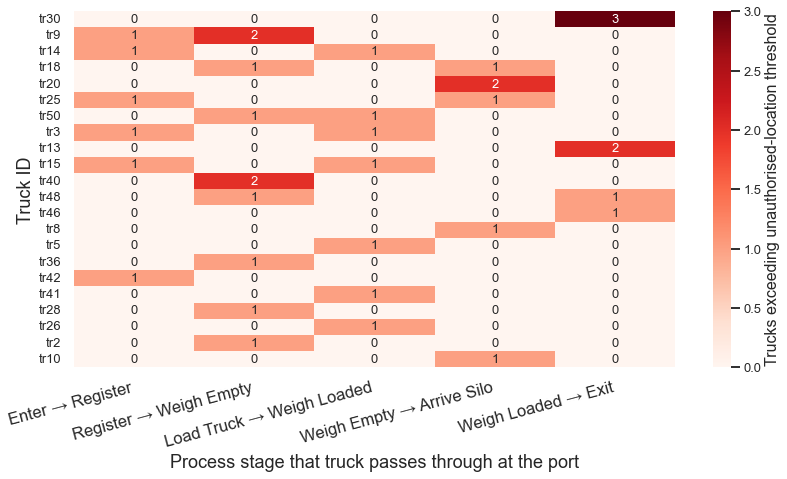

In [318]:
df_exploded = df.explode('exceeded_paths')

MIN_TOTAL_PER_TRUCK = 1      
MIN_TOTAL_PER_PATH  = 1      
ANNOTATE_MIN        = 2      
FIGSIZE             = (11, 7)  
XTICK_ROTATE_DEG    = 15      

pretty_path = {
    'Enter_to_Register_TTL_count':       'Enter → Register',
    'Register_to_WeighEmpty_TTL_count':  'Register → Weigh Empty',
    'Stack_Loaded_TTL_count':            'Load Truck → Weigh Loaded',
    'WeighEmpty_to_ArriveSilo_TTL_count':'Weigh Empty → Arrive Silo',
    'WeighLoaded_to_Exit_TTL_count':     'Weigh Loaded → Exit',
}
counts_df = df_exploded.groupby(['Truck ID', 'exceeded_paths']).size().reset_index(name='count')
pivot_df = counts_df.pivot(index='Truck ID', columns='exceeded_paths', values='count').fillna(0)
pivot_df = pivot_df.loc[pivot_df.sum(axis=1).sort_values(ascending=False).index]
pivot_df = pivot_df.rename(columns=pretty_path)

plt.figure(figsize=(12, 7))
ax = sns.heatmap(
    pivot_df,
    annot=True,         
    fmt=".0f",           
    cmap="Reds",      
    linecolor="white",   
    cbar_kws={'label': 'Count of trucks exceeding unauthorised-location threshold'},
    annot_kws={'size': 13} 
)


# plt.title('Frequency of trucks exceeding unauthorised-location threshold across multiple pickups and process stages at the port', fontsize=14)
plt.xlabel('Process stage that truck passes through at the port')
plt.ylabel('Truck ID')
plt.tick_params(axis='y', labelsize=13)
plt.xticks(rotation=XTICK_ROTATE_DEG, ha='right')

cbar = ax.collections[0].colorbar       
cbar.set_label('Trucks exceeding unauthorised-location threshold', size=16)
cbar.ax.tick_params(labelsize=13)

plt.tight_layout()
plt.savefig('process_stage_unauthorised_trucks.png',dpi = 300)
plt.show()

pickup Truck ID  Enter_to_Register_TTL_count  \
0         1.0      tr1                           16   
97        3.0      tr1                           11   
166       4.0      tr1                           15   
242       5.0      tr1                            9   
318       6.0      tr1                           12   
...       ...      ...                          ...   
34118   485.0      tr9                           11   
34197   486.0      tr9                           12   
34278   487.0      tr9                            7   
34347   488.0      tr9                           15   
34421   489.0      tr9                           10   

       Register_to_WeighEmpty_TTL_count  WeighEmpty_to_ArriveSilo_TTL_count  \
0                                    21                                  16   
97                                    5                                  12   
166                                   6                                   9   
242                                  21                                   8   
318                                  13                                   6   
...                                 ...                                 ...   
34118                                17                                  20   
34197                                 5                                  23   
34278                                14                                  11   
34347                                10                                  15   
34421                                24                                  16   

       Stack_Loaded_TTL_count  WeighLoaded_to_Exit_TTL_count  is_unexpected  \
0                           9                             19          False   
97                         16                              9          False   
166                        13                             17          False   
242                        14                              8          False   
318                        11                             12          False   
...                       ...                            ...            ...   
34118                       6                              8          False   
34197                      11                             14          False   
34278                      17                              4          False   
34347                       9                              9          False   
34421                       9                              7           True   

                         exceeded_paths  
0                                   NaN  
97                                  NaN  
166                                 NaN  
242                                 NaN  
318                                 NaN  
...                                 ...  
34118                               NaN  
34197                               NaN  
34278                               NaN  
34347                               NaN  
34421  Register_to_WeighEmpty_TTL_count  

[456 rows x 9 columns]

In [320]:
df_success_entry = df_success_pickups[df_success_pickups['activity'] == 'Enter the port']
df_success_entry

event_id            timestamp ocel_object_id  \
0      enter_tr1_Pcp404  2024-05-06 05:25:57            tr1   
97     enter_tr1_Pcp207  2024-05-10 08:22:49            tr1   
166    enter_tr1_Pcp485  2024-05-12 09:18:23            tr1   
242    enter_tr1_Pcp398  2024-05-14 11:35:55            tr1   
318    enter_tr1_Pcp396  2024-05-16 12:59:26            tr1   
...                 ...                  ...            ...   
34118   enter_tr9_Pcp74  2024-05-16 14:12:09            tr9   
34197  enter_tr9_Pcp464  2024-05-18 15:33:37            tr9   
34278  enter_tr9_Pcp291  2024-05-20 16:25:56            tr9   
34347  enter_tr9_Pcp478  2024-05-22 18:09:58            tr9   
34421  enter_tr9_Pcp267  2024-05-28 02:34:27            tr9   

      ocel_IoT_object_id rain_condition        activity  RFID No Cargo ID  \
0             rfidBKTRLP      Have Rain  Enter the port      NaN      Cr5   
97            rfidBKTRLP      Have Rain  Enter the port      NaN     Cr20   
166           rfidBKTRLP      Have Rain  Enter the port      NaN     Cr19   
242           rfidBKTRLP        No Rain  Enter the port      NaN     Cr20   
318           rfidBKTRLP      Have Rain  Enter the port      NaN      Cr4   
...                  ...            ...             ...      ...      ...   
34118         rfidKEBJGC      Have Rain  Enter the port      NaN     Cr16   
34197         rfidKEBJGC        No Rain  Enter the port      NaN     Cr17   
34278         rfidKEBJGC      Have Rain  Enter the port      NaN     Cr19   
34347         rfidKEBJGC        No Rain  Enter the port      NaN     Cr15   
34421         rfidKEBJGC        No Rain  Enter the port      NaN     Cr19   

       LPT  Axles  ...  ArrivalSilo_Determine Determine_Stack Stack_Loaded  \
0      NaN    NaN  ...              13.433333        1.366667   103.600000   
97     NaN    NaN  ...               3.316667        1.383333     7.016667   
166    NaN    NaN  ...               7.533333        1.283333    83.983333   
242    NaN    NaN  ...              12.300000        0.700000    55.233333   
318    NaN    NaN  ...              11.316667        7.216667    39.316667   
...    ...    ...  ...                    ...             ...          ...   
34118  NaN    NaN  ...              12.233333        3.950000    13.950000   
34197  NaN    NaN  ...               3.366667        0.933333    20.633333   
34278  NaN    NaN  ...               3.400000        3.866667    72.716667   
34347  NaN    NaN  ...              15.400000        1.033333    32.816667   
34421  NaN    NaN  ...               7.850000        5.850000    22.900000   

       LoadedWeighing_Eval  Eval_Exit  Enter_to_Register_TTL_count  \
0                 3.833333   2.116667                           16   
97               14.500000   1.033333                           11   
166               7.866667   2.716667                           15   
242               2.383333   0.200000                            9   
318               6.666667   0.183333                           12   
...                    ...        ...                          ...   
34118             4.966667  10.766667                           11   
34197            15.833333   0.300000                           12   
34278             5.283333   2.033333                            7   
34347             2.400000   2.150000                           15   
34421             6.400000   3.516667                           10   

       Register_to_WeighEmpty_TTL_count  WeighEmpty_to_ArriveSilo_TTL_count  \
0                                    21                                  16   
97                                    5                                  12   
166                                   6                                   9   
242                                  21                                   8   
318                                  13                                   6   
...                                 ...                                 ...   
34

In [329]:
df_success_entry_filtered = df_success_entry[df_success_entry['pickup'].isin(bad_pickups)]
df_success_entry_filtered2 = df_success_entry_filtered[['pickup','Truck ID','timestamp','rain_condition']]
df_success_entry_filtered2

pickup Truck ID            timestamp rain_condition
1271     20.0     tr10  2024-05-24 15:11:53        No Rain
2931     45.0     tr13  2024-05-14 18:16:11        No Rain
3181     48.0     tr13  2024-05-20 22:15:31        No Rain
3576     53.0     tr14  2024-05-12 10:30:03        No Rain
4051     61.0     tr15  2024-05-10 08:06:56      Have Rain
4209     63.0     tr15  2024-05-14 10:34:52        No Rain
6547     95.0     tr18  2024-05-22 15:37:47        No Rain
7560    109.0      tr2  2024-05-10 14:12:17        No Rain
8489    121.0     tr20  2024-05-14 09:36:57        No Rain
8729    124.0     tr20  2024-05-20 13:38:16        No Rain
11917   168.0     tr25  2024-05-14 10:30:01        No Rain
12071   170.0     tr25  2024-05-18 12:47:01        No Rain
12817   180.0     tr26  2024-05-20 17:33:45        No Rain
14209   199.0     tr28  2024-05-20 16:54:50      Have Rain
15286   214.0      tr3  2024-05-10 16:03:51        No Rain
15593   218.0      tr3  2024-05-19 00:57:05        No Rain
16034   226.0     tr30  2024-05-16 09:48:39        No Rain
16176   228.0     tr30  2024-05-20 12:11:02        No Rain
16357   230.0     tr30  2024-05-24 14:34:19      Have Rain
19659   282.0     tr36  2024-05-08 14:00:17        No Rain
23501   335.0     tr40  2024-05-14 10:28:46        No Rain
23584   336.0     tr40  2024-05-16 11:39:07        No Rain
24136   343.0     tr41  2024-05-10 14:07:10        No Rain
25505   360.0     tr42  2024-05-24 16:11:24      Have Rain
27691   393.0     tr46  2024-05-14 11:14:58        No Rain
29088   414.0     tr48  2024-05-18 18:30:56        No Rain
29170   415.0     tr48  2024-05-20 20:09:04        No Rain
30450   432.0      tr5  2024-05-16 16:27:09        No Rain
30923   439.0     tr50  2024-05-08 13:15:49        No Rain
31336   444.0     tr50  2024-05-18 21:32:39      Have Rain
33492   476.0      tr8  2024-05-22 17:46:20        No Rain
33733   480.0      tr9  2024-05-06 04:50:19        No Rain
33825   481.0      tr9  2024-05-08 06:44:10      Have Rain
34421   489.0      tr9  2024-05-28 02:34:27        No Rain

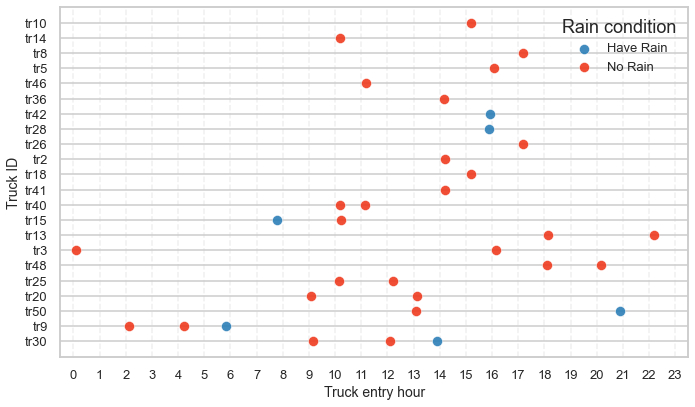

In [350]:
df_plot = df_success_entry_filtered2.copy()
df_plot['timestamp'] = pd.to_datetime(df_plot['timestamp'])
df_plot['hour'] = df_plot['timestamp'].dt.hour

rain_order = ['Have Rain', 'No Rain']
df_plot['rain_condition'] = pd.Categorical(df_plot['rain_condition'], categories=rain_order, ordered=True)

truck_order = (df_plot['Truck ID'].value_counts()
               .sort_values(ascending=False).index.tolist())
truck_to_y = {tr:i for i,tr in enumerate(truck_order)}
df_plot['ypos'] = df_plot['Truck ID'].map(truck_to_y)

dodge_map = {'Have Rain': -0.15, 'No Rain': 0.15}
rng = np.random.default_rng(42)  

base_x = df_plot['hour'].astype(float)
dodge = df_plot['rain_condition'].astype(str).map(dodge_map).fillna(0.0)
jitter = rng.uniform(-0.07, 0.07, size=len(df_plot)) 
df_plot['xpos'] = base_x + dodge + jitter


plt.figure(figsize=(10, 6))

color_map = {'Have Rain': '#2C7FB8', 'No Rain': '#F03B20'}

for cond in rain_order:
    sub = df_plot[df_plot['rain_condition'] == cond]
    if len(sub) == 0:
        continue
    plt.scatter(sub['xpos'], sub['ypos'],
                s=100, alpha=0.9, label=cond,
                edgecolor='white', linewidth=0.5,
                c=color_map.get(cond, '#888888'))


# for _, r in df_plot.iterrows():
#     plt.text(
#         r['xpos'], r['ypos'] + 0.18,  
#         str(int(r['pickup'])),         
#         ha='center', va='bottom',
#         fontsize=7, color='darkgrey'
#     )

plt.yticks(range(len(truck_order)), truck_order)
plt.xticks(range(0, 24, 1))
plt.xlim(-0.5, 23.5)

plt.xlabel('Truck entry hour',fontsize = 14)
plt.ylabel('Truck ID',fontsize = 14)
plt.tick_params(axis='x', labelsize=13)
plt.tick_params(axis='y', labelsize=13)
# plt.title('Distribution of trucks exceeding the unauthorised-location threshold by entry hour and rainfall condition at the port')

plt.grid(axis='x', linestyle='--', alpha=0.3)
leg = plt.legend(title='Rain condition', loc='upper right', frameon=False,fontsize = 13)

plt.tight_layout()
plt.savefig('bad_pickups_entry_rain.png',dpi = 300)
plt.show()


In [467]:
# path_regions = {
#     "entry_to_register": {"lat_min": 21.9860, "lat_max": 21.9940, "lon_min": 100.4890, "lon_max": 100.4930},
#     "register_to_weigh": {"lat_min": 21.9945, "lat_max": 22.0005, "lon_min": 100.4950, "lon_max": 100.52},
#     "weigh_to_yard":     {"lat_min": 22.0080, "lat_max": 22.0150, "lon_min": 100.5250, "lon_max": 100.5450},
#     "yard_to_weigh":     {"lat_min": 21.9880, "lat_max": 22.0075, "lon_min": 100.5555, "lon_max": 100.5650},
#     "weigh_to_exit":     {"lat_min": 21.98, "lat_max": 21.9850, "lon_min": 100.5655, "lon_max": 100.5700},
# }

# region_df = (
#     pd.DataFrame.from_dict(path_regions, orient='index')
#       .reset_index()
#       .rename(columns={'index': 'Path_Stage'})
# )

# df_gps_success_merged = df_gps_success.merge(region_df, on='Path_Stage', how='left')
# df_gps_success_merged

##### Pickups with high turnaround time

In [468]:
df_high_turnaround = pd.read_csv('Success_Long_TurnAround.csv')
df_high_turnaround

event_id            timestamp ocel_object_id  \
0        enter_tr1_Pcp404  2024-05-06 05:25:57            tr1   
1                     NaN  2024-05-06 05:26:27            tr1   
2                     NaN  2024-05-06 05:26:32            tr1   
3                     NaN  2024-05-06 05:26:37            tr1   
4                     NaN  2024-05-06 05:26:42            tr1   
...                   ...                  ...            ...   
8814                  NaN  2024-05-10 11:35:26            tr9   
8815                  NaN  2024-05-10 11:35:31            tr9   
8816                  NaN  2024-05-10 11:35:36            tr9   
8817  eval_tr9exit_Pcp431  2024-05-10 11:35:41            tr9   
8818      exit_tr9_Pcp431  2024-05-10 11:36:32            tr9   

     ocel_IoT_object_id rain_condition                 activity  RFID No  \
0            rfidBKTRLP      Have Rain           Enter the port      NaN   
1                   NaN            NaN     Track Truck Location      NaN   
2                   NaN            NaN     Track Truck Location      NaN   
3                   NaN            NaN     Track Truck Location      NaN   
4                   NaN            NaN     Track Truck Location      NaN   
...                 ...            ...                      ...      ...   
8814                NaN            NaN     Track Truck Location      NaN   
8815                NaN            NaN     Track Truck Location      NaN   
8816                NaN            NaN     Track Truck Location      NaN   
8817                NaN            NaN  Evaluate the Truck Exit      NaN   
8818                NaN            NaN            Exit the port      NaN   

     Cargo ID  LPT  Axles  ...  ArrivalSilo_Determine Determine_Stack  \
0         Cr5  NaN    NaN  ...              13.433333        1.366667   
1         Cr5  NaN    NaN  ...              13.433333        1.366667   
2         Cr5  NaN    NaN  ...              13.433333        1.366667   
3         Cr5  NaN    NaN  ...              13.433333        1.366667   
4         Cr5  NaN    NaN  ...              13.433333        1.366667   
...       ...  ...    ...  ...                    ...             ...   
8814     Cr11  NaN    NaN  ...               4.566667        1.383333   
8815     Cr11  NaN    NaN  ...               4.566667        1.383333   
8816     Cr11  NaN    NaN  ...               4.566667        1.383333   
8817     Cr11  NaN    NaN  ...               4.566667        1.383333   
8818     Cr11  NaN    NaN  ...               4.566667        1.383333   

     Stack_Loaded  LoadedWeighing_Eval Eval_Exit  Enter_to_Register_TTL_count  \
0      103.600000             3.833333  2.116667                           16   
1      103.600000             3.833333  2.116667                           16   
2      103.600000             3.833333  2.116667                           16   
3      103.600000             3.833333  2.116667                           16   
4      103.600000             3.833333  2.116667                           16   
...           ...                  ...       ...                          ...   
8814    83.833333             2.866667  0.850000                           12   
8815    83.833333             2.866667  0.850000                           12   
8816    83.833333             2.866667  0.850000                           12   
8817    83.833333             2.866667  0.850000                           12   
8818    83.833333             2.866667  0.850000                           12   

      Register_to_WeighEmpty_TTL_count  WeighEmpty_to_ArriveSilo_TTL_count  \
0                                   21                                  16   
1                                   21                                  16   
2                                   21                                  16   
3                                   21                                  16   
4                                   21                                  16   
...  

In [469]:
cols = ['Enter_RegisterArrival','Register_EmptyWeighing','EmptyWeighing_ArrivalSilo', 'ArrivalSilo_Determine','Determine_Stack', 'Stack_Loaded','LoadedWeighing_Eval','Eval_Exit']
def first_valid(s):
    s = pd.to_numeric(s, errors='coerce').dropna()
    return s.iloc[0] if len(s) else np.nan
df_high_turnaround_per_pickup = df_high_turnaround.groupby('pickup').agg({c: first_valid for c in cols})
df_high_turnaround_per_pickup

Enter_RegisterArrival  Register_EmptyWeighing  \
pickup                                                  
1.0                  7.583333                3.450000   
4.0                 18.450000                3.233333   
10.0                 6.483333                6.033333   
15.0                 5.016667                3.633333   
20.0                 1.733333               16.866667   
...                       ...                     ...   
474.0                8.166667                7.933333   
477.0                3.350000                6.350000   
480.0                1.166667                3.933333   
481.0                3.800000                6.483333   
482.0               19.683333                4.516667   

        EmptyWeighing_ArrivalSilo  ArrivalSilo_Determine  Determine_Stack  \
pickup                                                                      
1.0                      2.350000              13.433333         1.366667   
4.0                      3.916667               7.533333         1.283333   
10.0                     2.683333              12.733333         0.633333   
15.0                     5.016667              14.400000         3.233333   
20.0                     5.150000               9.516667         1.083333   
...                           ...                    ...              ...   
474.0                    6.433333               2.666667         1.950000   
477.0                    2.866667               8.450000         0.916667   
480.0                    3.633333              14.033333         2.966667   
481.0                    2.283333               6.016667         4.283333   
482.0                    3.316667               4.566667         1.383333   

        Stack_Loaded  LoadedWeighing_Eval  Eval_Exit  
pickup                                                
1.0       103.600000             3.833333   2.116667  
4.0        83.983333             7.866667   2.716667  
10.0      116.633333             7.433333   1.033333  
15.0       96.500000             4.650000   0.316667  
20.0       97.750000             7.833333   1.966667  
...              ...                  ...        ...  
474.0      96.416667             7.433333   0.633333  
477.0      78.750000             2.366667   1.150000  
480.0      77.983333             4.383333   0.883333  
481.0     136.616667             6.533333   3.333333  
482.0      83.833333             2.866667   0.850000  

[114 rows x 8 columns]

In [474]:
# df = df_high_turnaround_per_pickup.copy()
# long_df = (df.reset_index()
#              .melt(id_vars='pickup', var_name='Stage', value_name='Minutes'))
# long_df = long_df.replace([np.inf, -np.inf], np.nan).dropna(subset=['Minutes'])
# long_df = long_df[long_df['Minutes'] >= 0]

# stages = df.columns.tolist()
# long_df['Stage'] = pd.Categorical(long_df['Stage'], categories=stages, ordered=True)

# fig, axes = plt.subplots(2, 4, figsize=(16, 6), sharex=False, sharey=False)
# axes = axes.ravel()

# for i, stage in enumerate(stages):
#     ax = axes[i]
#     sns.kdeplot(
#         data=long_df[long_df['Stage'] == stage],
#         # x='Minutes',
#         fill=True,
#         bw_adjust=1.0,
#         clip=(0, None),
#         ax=ax
#     )
#     ax.set_title(stage)
#     ax.grid(False)
#     ax.set_xlabel('Duration (minutes)')
#     ax.set_ylabel('Density')

# plt.tight_layout()
# plt.show()